<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Modeling Predictiion Dengue Cases in Singapore

### Import libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.model_selection import train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools
#import warnings
import matplotlib.pyplot as plt

Load Data

In [2]:
df = pd.read_csv('../data/weekly_data.csv')
df2= pd.read_csv('../data/weekly_data.csv')
df3= pd.read_csv('../data/weekly_data.csv')
df4= pd.read_csv('../data/weekly_data.csv')

In [3]:
df.head(11)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
0,2012-W01,106.8,26.762500,22.2,31.4,74,8,239701,115076
1,2012-W02,25.8,26.228571,22.1,32.3,66,8,239701,115076
2,2012-W03,28.0,26.914286,22.9,32.5,61,6,239701,115076
3,2012-W04,8.6,26.600000,23.5,31.6,52,10,239701,115076
4,2012-W05,55.7,26.485714,21.5,31.6,85,7,239701,115076
5,2012-W06,1.6,27.500000,24.4,32.3,87,5,283638,132094
6,2012-W07,38.2,26.671429,22.7,31.9,65,6,283638,132094
7,2012-W08,3.2,27.700000,24.8,32.6,51,9,283638,132094
8,2012-W09,26.4,27.142857,23.8,33.2,55,6,283638,132094
9,2012-W10,52.6,26.928571,21.1,31.5,46,5,310783,171836


In [4]:
df.tail(20)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
552,2022-W33,29.4,28.385714,24.0,32.6,679,52,145749,87838
553,2022-W34,54.6,27.357143,23.7,31.9,662,46,145749,87838
554,2022-W35,10.8,27.828571,24.7,32.5,581,51,145749,87838
555,2022-W36,9.4,27.885714,24.8,32.4,570,40,195554,136038
556,2022-W37,27.4,27.671429,23.5,31.9,544,44,195554,136038
557,2022-W38,51.0,27.771429,22.7,32.0,472,35,195554,136038
558,2022-W39,58.4,28.171429,22.4,32.9,426,34,195554,136038
559,2022-W40,42.0,26.928571,23.8,32.5,397,29,163367,113473
560,2022-W41,43.4,27.842857,23.5,33.4,376,40,163367,113473
561,2022-W42,61.4,27.814286,23.1,33.0,373,35,163367,113473


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           572 non-null    object 
 1   total_rainfall       572 non-null    float64
 2   mean_temperature     572 non-null    float64
 3   minimum_temperature  572 non-null    float64
 4   maximum_temperature  572 non-null    float64
 5   dengue_cases         572 non-null    int64  
 6   interest             572 non-null    int64  
 7   inbound              572 non-null    int64  
 8   outbound             572 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 40.3+ KB


In [6]:
df.set_index(df['Unnamed: 0'],inplace=True)

In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

conduct data shift as we are unbale to use current month data to predict current month dengue cases, therefor we will be using data from pervious month to train the model

In [8]:
#shift feature by 10 week
df['mean_temperature'] = df['mean_temperature'].shift(10)
df['total_rainfall'] = df['total_rainfall'].shift(10)
df['interest'] = df['interest'].shift(10)
df['minimum_temperature'] = df['minimum_temperature'].shift(10)
df['maximum_temperature'] = df['maximum_temperature'].shift(10)
df['inbound'] = df['inbound'].shift(10)
df['outbound'] = df['outbound'].shift(10)

# Drop any rows with missing values
df.dropna(inplace=True)

In [9]:
df.head(20)

,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
Unnamed: 0,,,,,,,,
2012-W11,106.8,26.762500,22.2,31.4,64,8.0,239701.0,115076.0
2012-W12,25.8,26.228571,22.1,32.3,73,8.0,239701.0,115076.0
2012-W13,28.0,26.914286,22.9,32.5,48,6.0,239701.0,115076.0
2012-W14,8.6,26.600000,23.5,31.6,52,10.0,239701.0,115076.0
2012-W15,55.7,26.485714,21.5,31.6,82,7.0,239701.0,115076.0
2012-W16,1.6,27.500000,24.4,32.3,77,5.0,283638.0,132094.0
2012-W17,38.2,26.671429,22.7,31.9,64,6.0,283638.0,132094.0
2012-W18,3.2,27.700000,24.8,32.6,88,9.0,283638.0,132094.0
2012-W19,26.4,27.142857,23.8,33.2,97,6.0,283638.0,132094.0


In [10]:
df.tail(20)

,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
Unnamed: 0,,,,,,,,
2022-W33,75.4,27.814286,22.9,33.6,679,91.0,135933.0,119020.0
2022-W34,7.8,27.900000,23.9,31.9,662,87.0,135933.0,119020.0
2022-W35,44.2,27.542857,23.5,31.9,581,88.0,135933.0,119020.0
2022-W36,14.8,28.628571,23.9,32.4,570,83.0,135933.0,119020.0
2022-W37,25.6,28.542857,24.4,32.5,544,82.0,181685.0,105543.0
2022-W38,28.4,29.071429,23.6,32.9,472,72.0,181685.0,105543.0
2022-W39,42.2,28.442857,22.2,32.9,426,65.0,181685.0,105543.0
2022-W40,45.2,28.171429,23.9,32.4,397,64.0,181685.0,105543.0
2022-W41,17.2,27.842857,24.2,32.2,376,62.0,145749.0,87838.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 2012-W11 to 2022-W52
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_rainfall       562 non-null    float64
 1   mean_temperature     562 non-null    float64
 2   minimum_temperature  562 non-null    float64
 3   maximum_temperature  562 non-null    float64
 4   dengue_cases         562 non-null    int64  
 5   interest             562 non-null    float64
 6   inbound              562 non-null    float64
 7   outbound             562 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 39.5+ KB


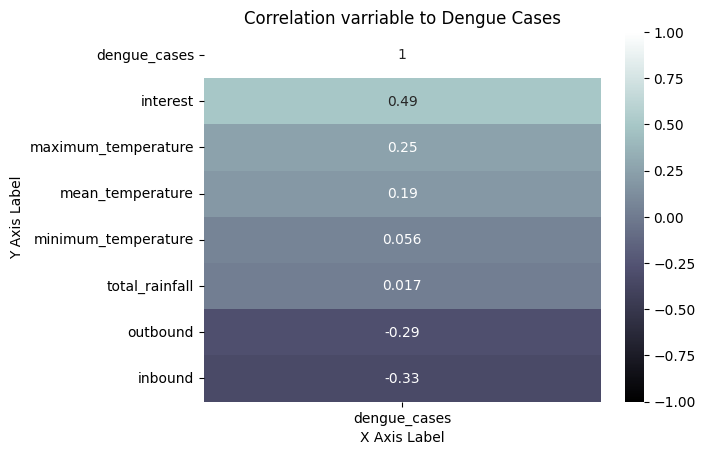

In [12]:
# Define custom y-axis tick labels
yticklabels = df['dengue_cases']

# Create a heatmap using seaborn with custom y-axis tick labels
#sns.heatmap(df.drop(columns='Unnamed: 0', inplace=False), annot=True, cmap='coolwarm', yticklabels=yticklabels)
sns.heatmap(df.corr(method='pearson',numeric_only=True)[['dengue_cases']].sort_values(by='dengue_cases', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='bone')

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Correlation varriable to Dengue Cases')

# Display the heatmap
plt.show()

From this heatmap we are able to tell that variables: interest, mean temperature, inbound and outbound has some correlation to Dengue Cases 

In [13]:
#function to plot 
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

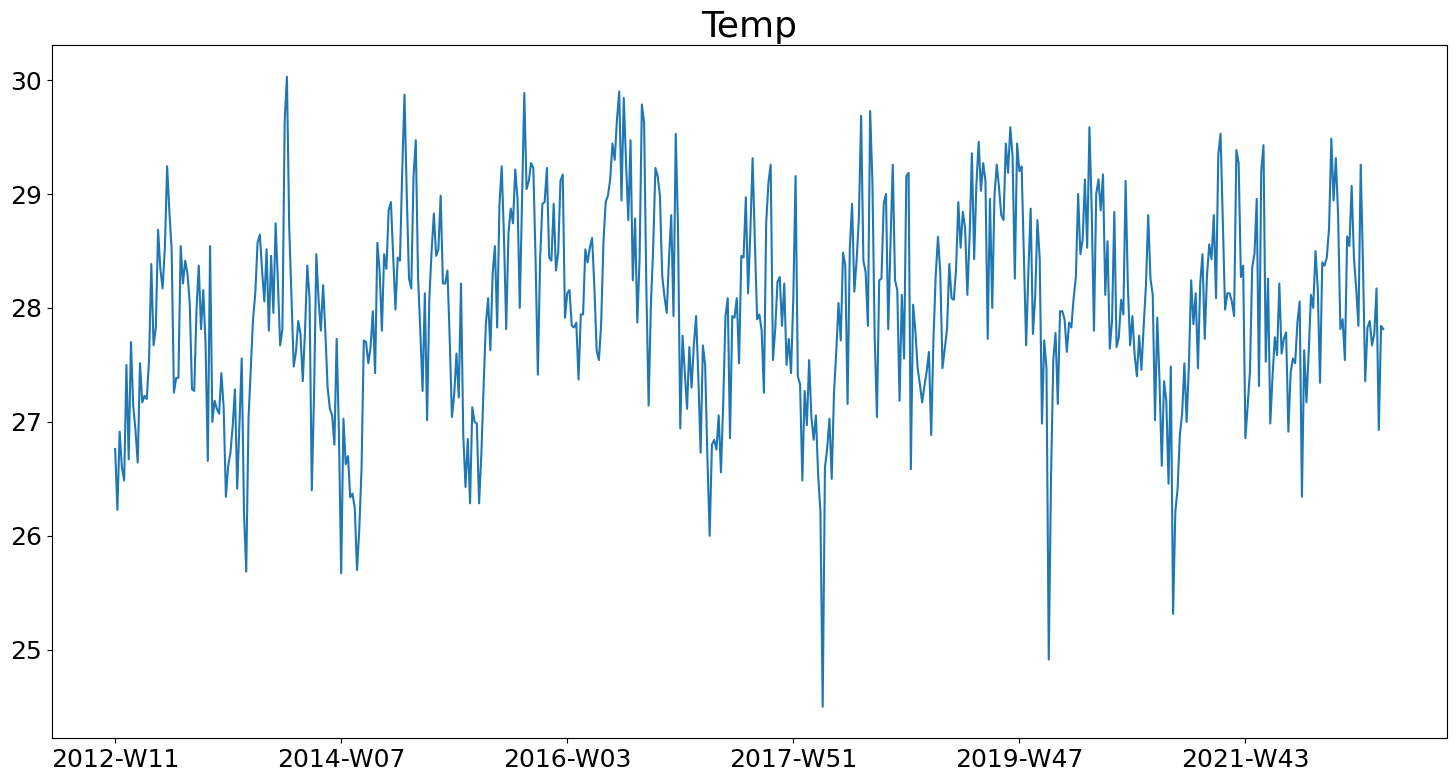

In [14]:
plot_series(df,['mean_temperature'], title='Temp', steps =100)

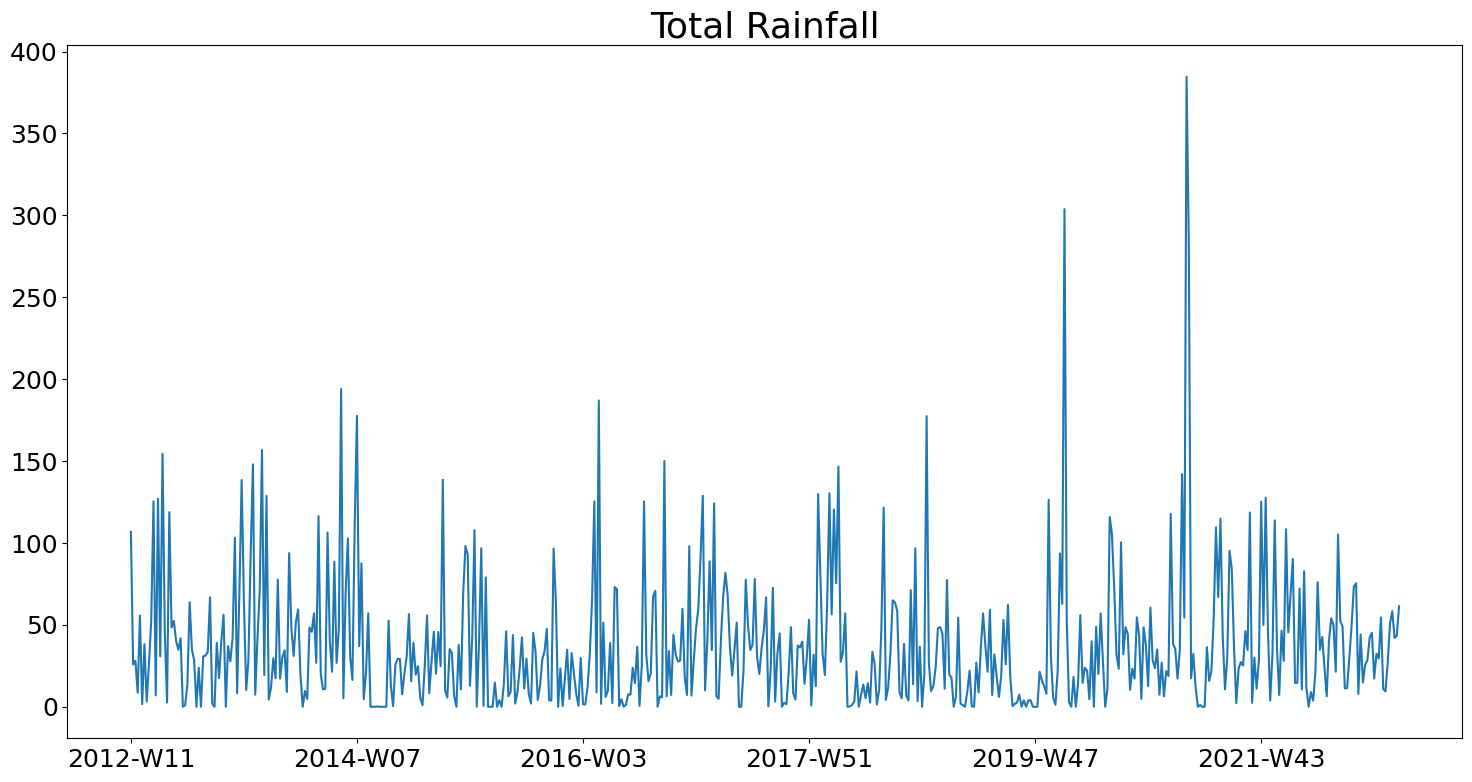

In [15]:
plot_series(df,['total_rainfall'], title='Total Rainfall', steps =100)

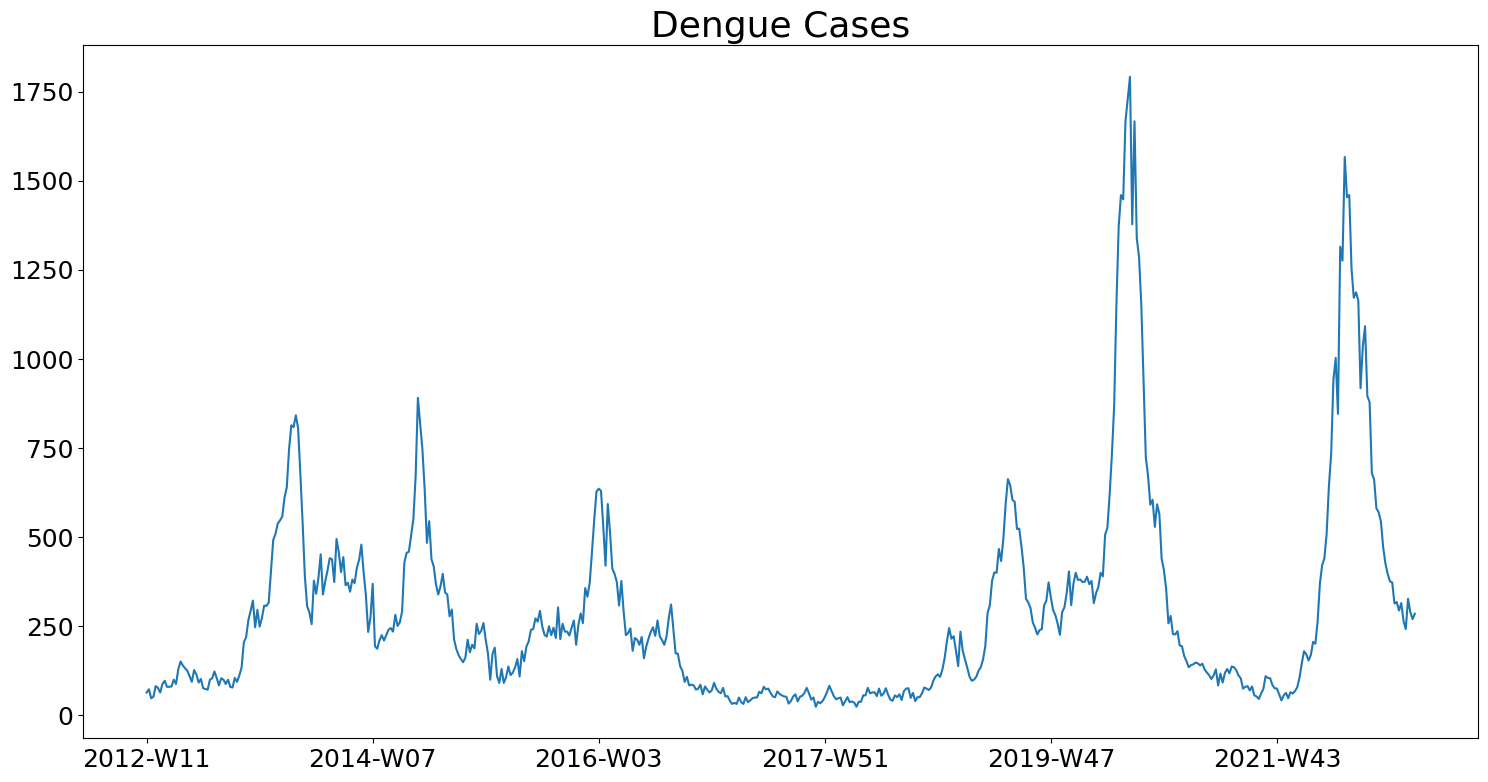

In [16]:
plot_series(df,['dengue_cases'], title='Dengue Cases', steps =100)

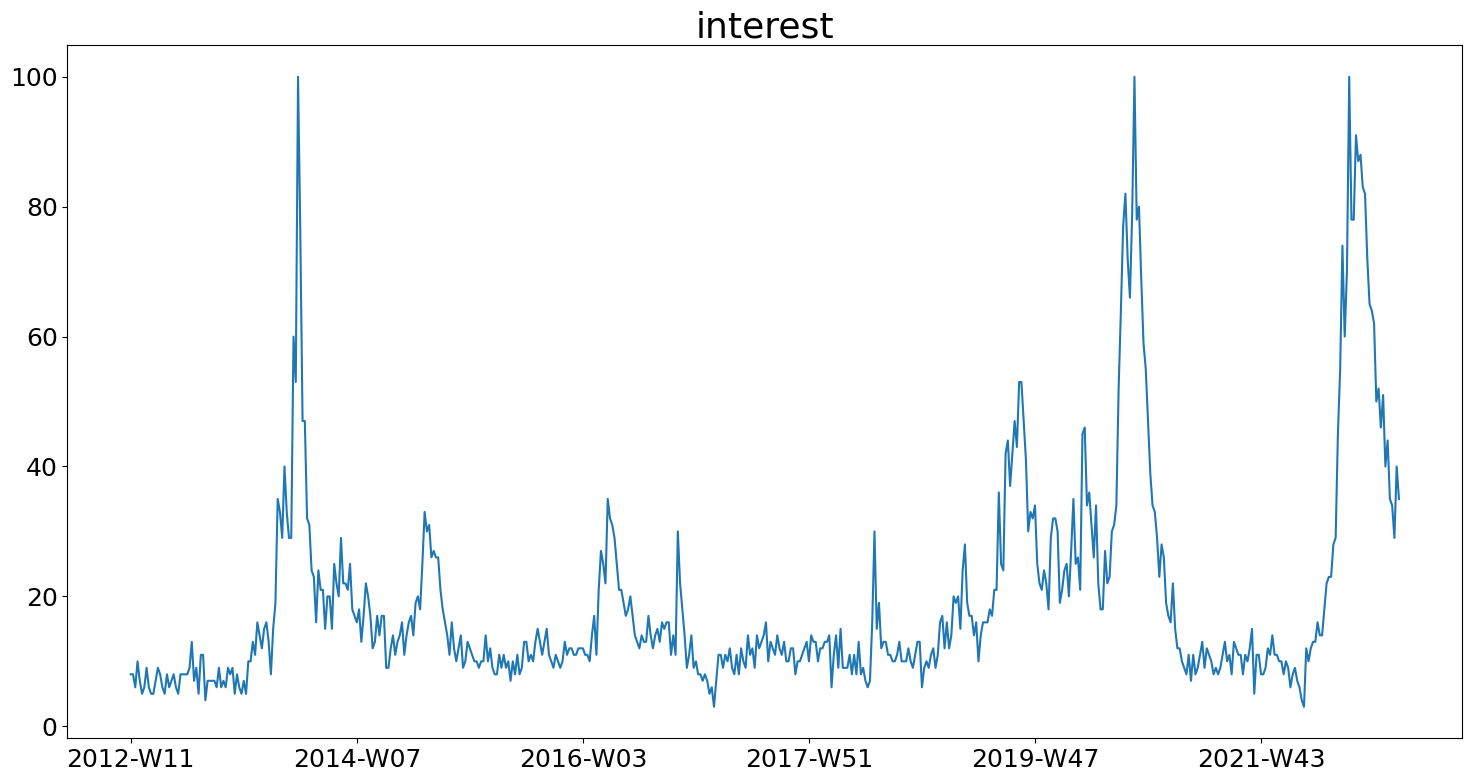

In [17]:
plot_series(df,['interest'], title='interest', steps =100)

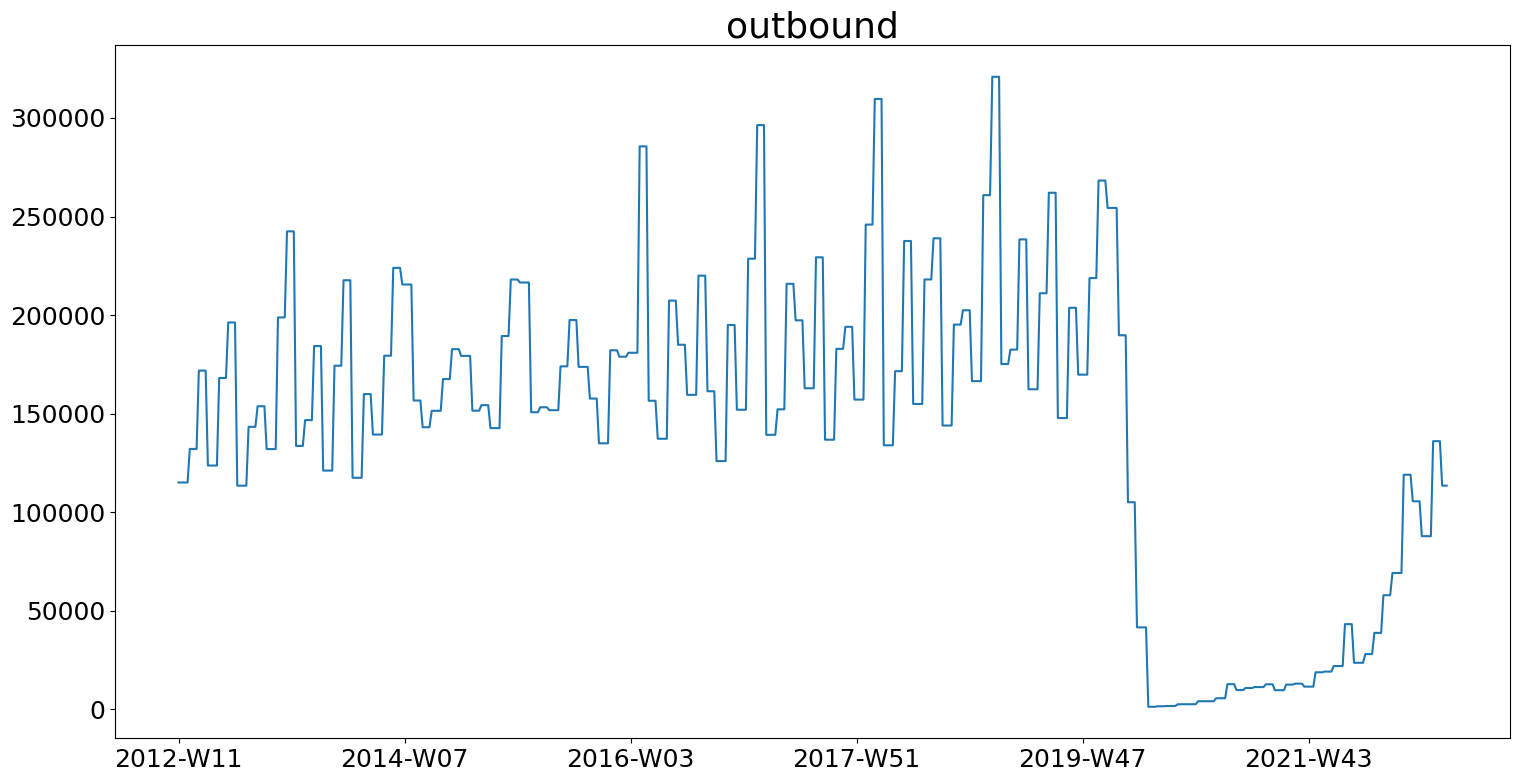

In [18]:
plot_series(df,['outbound'], title='outbound', steps =100)

create first and second different to check stationary

In [19]:
df['first_diff_dengue'] = df['dengue_cases'].diff()
df['second_diff_dengue'] = df['dengue_cases'].diff().diff()

In [20]:
adfuller(df['mean_temperature'])

(-5.318920312140637,
 5.002553954971674e-06,
 4,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 1040.5961070301323)

In [21]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [22]:
interpret_dftest(adfuller(df['dengue_cases']))

Test Statistic   -3.698918
p-value           0.004128
dtype: float64

In [23]:
interpret_dftest(adfuller(df['first_diff_dengue'].dropna()))

Test Statistic   -7.675585e+00
p-value           1.552003e-11
dtype: float64

In [24]:
interpret_dftest(adfuller(df['second_diff_dengue'].dropna()))

Test Statistic   -9.017411e+00
p-value           5.899255e-15
dtype: float64

From this interpret, we can conduct one diffencing is enough

In [25]:
Weekly_dengue = pd.DataFrame(df['dengue_cases'])
Weekly_dengue

,dengue_cases
Unnamed: 0,
2012-W11,64
2012-W12,73
2012-W13,48
2012-W14,52
2012-W15,82
...,...
2022-W48,242
2022-W49,327
2022-W50,290


### Finding must way to split the data

In [26]:
print(f'Number of observations: {round(len(Weekly_dengue))} ')
print(f'Number of training observations: {round(len(Weekly_dengue) * 0.75)}')
print(f'Number of testing observations: {len(Weekly_dengue) - round(len(Weekly_dengue) * 0.75)}')

Number of observations: 562 
Number of training observations: 422
Number of testing observations: 140


In [27]:
print(f'Number of observations: {round(len(df))} ')
print(f'Number of training observations: {round(len(df) * 0.85)}')
print(f'Number of testing observations: {len(df) - round(len(df) * 0.85)}')

#train = Weekly_dengue.iloc[:430,]
#test = Weekly_dengue.iloc[430:,]

Number of observations: 562 
Number of training observations: 478
Number of testing observations: 84


In [28]:
print(f'Number of observations: {round(len(df))} ')
print(f'Number of training observations: {round(len(df) * 0.9)}')
print(f'Number of testing observations: {len(df) - round(len(df) * 0.9)}')

#train = Weekly_dengue.iloc[:509,]
#test = Weekly_dengue.iloc[508:,]

Number of observations: 562 
Number of training observations: 506
Number of testing observations: 56


In [29]:
Weekly_dengue.tail()

,dengue_cases
Unnamed: 0,
2022-W48,242
2022-W49,327
2022-W50,290
2022-W51,270
2022-W52,285


we will use 10 year of data to predict 1 year data

### Create function for vision on train and pred vs actual data

In [30]:
def actual_pred_plot(actual, pred):
    """
    Function to return plot with 2 line of : actual data, predited data
    
    Parameters
    ----------

    
    actual: pandas Dataframe
        whole orignal dataset
        
    pred: pandas Dataframe
        pred dataset
        
    Returns
    -------
    plot
    
    """
    plt.figure(figsize=(16, 8))
    plt.plot(pred, c='orange',label='Predicted');
    plt.plot(actual, color = 'blue',label='Actual Data Set')
    plt.legend()

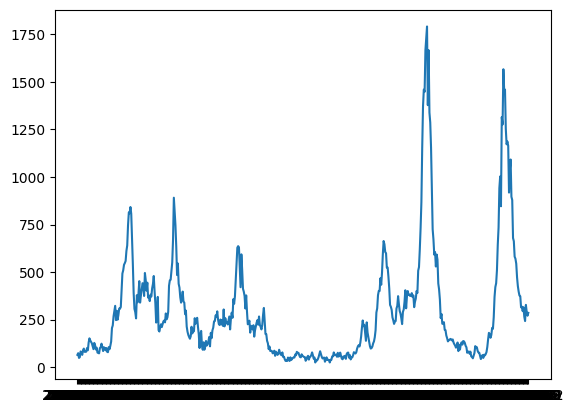

In [31]:
plt.plot(df['dengue_cases'])

In [32]:
df2

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
0,2012-W01,106.8,26.762500,22.2,31.4,74,8,239701,115076
1,2012-W02,25.8,26.228571,22.1,32.3,66,8,239701,115076
2,2012-W03,28.0,26.914286,22.9,32.5,61,6,239701,115076
3,2012-W04,8.6,26.600000,23.5,31.6,52,10,239701,115076
4,2012-W05,55.7,26.485714,21.5,31.6,85,7,239701,115076
...,...,...,...,...,...,...,...,...,...
567,2022-W48,96.8,27.057143,22.8,32.9,242,19,204085,185454
568,2022-W49,65.6,26.800000,23.9,32.7,327,27,232834,250220
569,2022-W50,81.8,26.414286,23.9,32.2,290,30,232834,250220
570,2022-W51,10.2,26.685714,23.4,31.7,270,20,232834,250220


In [33]:
df3['dengue_cases']=df2['dengue_cases'].shift(10)
df3.dropna(inplace=True)

In [34]:
df3
df3 = df3.reset_index(drop=True)

# Model

### Linear model

Mean Squared Error: 45923.26685955321
Root Mean Squared Error : 214.29714617687566
r2 score:0.7763943818033834
MAE: 161.10490292344397
[array([48.51020275,  0.76724086,  9.14765095])]


Text(0, 0.5, 'Dengue_cases')

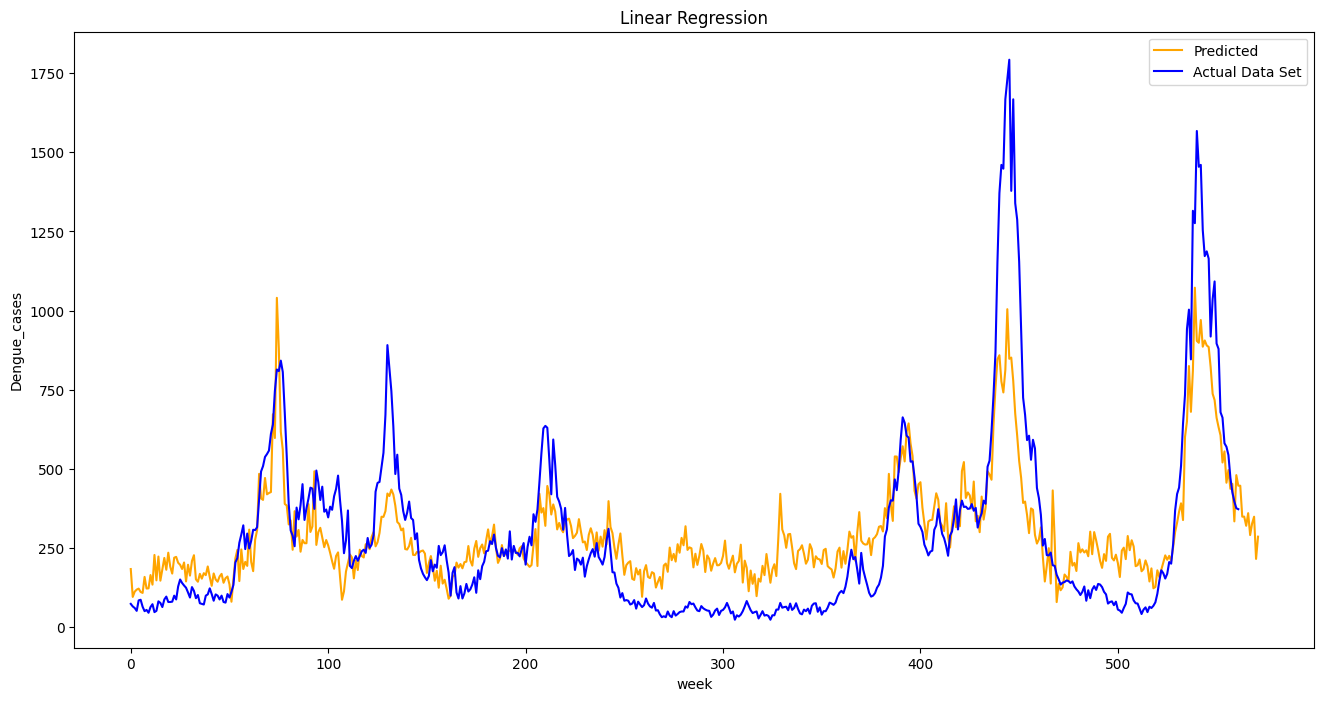

In [35]:
# Step 1 : Set columns for y and X


y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall','interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

#X_train= train[['mean_temperature','total_rainfall', 'interest']].values
#y_train= train['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

df2X=df2[['mean_temperature','total_rainfall', 'interest']].values  # Target variable
df2y=df2['dengue_cases'].values.reshape(-1, 1)
df3y=df3['dengue_cases'].values.reshape(-1, 1)

# Step 4: Make predictions on the test set
y_pred_lr = model_lr.predict(df2X[504:562])

#predict on unseen data
y_pred_lr_10week= model_lr.predict(df2X[0:572])

# Step 5: Evaluate the model
mse_lr = mean_squared_error(df3y[504:562], y_pred_lr)
print(f'Mean Squared Error: {mse_lr}')

rmse_lr= np.sqrt(mse_lr)
print(f'Root Mean Squared Error : {rmse_lr}')

r2_lr = r2_score(df3y[504:562], y_pred_lr)
print(f'r2 score:{r2_lr}')

mae_lr = mean_absolute_error(df3y[504:562], y_pred_lr)
print(f'MAE: {mae_lr}')

#coef
coef_lr=list(model_lr.coef_)
print(coef_lr)

#plot
actual_pred_plot(df3['dengue_cases'],y_pred_lr_10week,)
plt.title('Linear Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Text(0, 0.5, 'Dengue_cases')

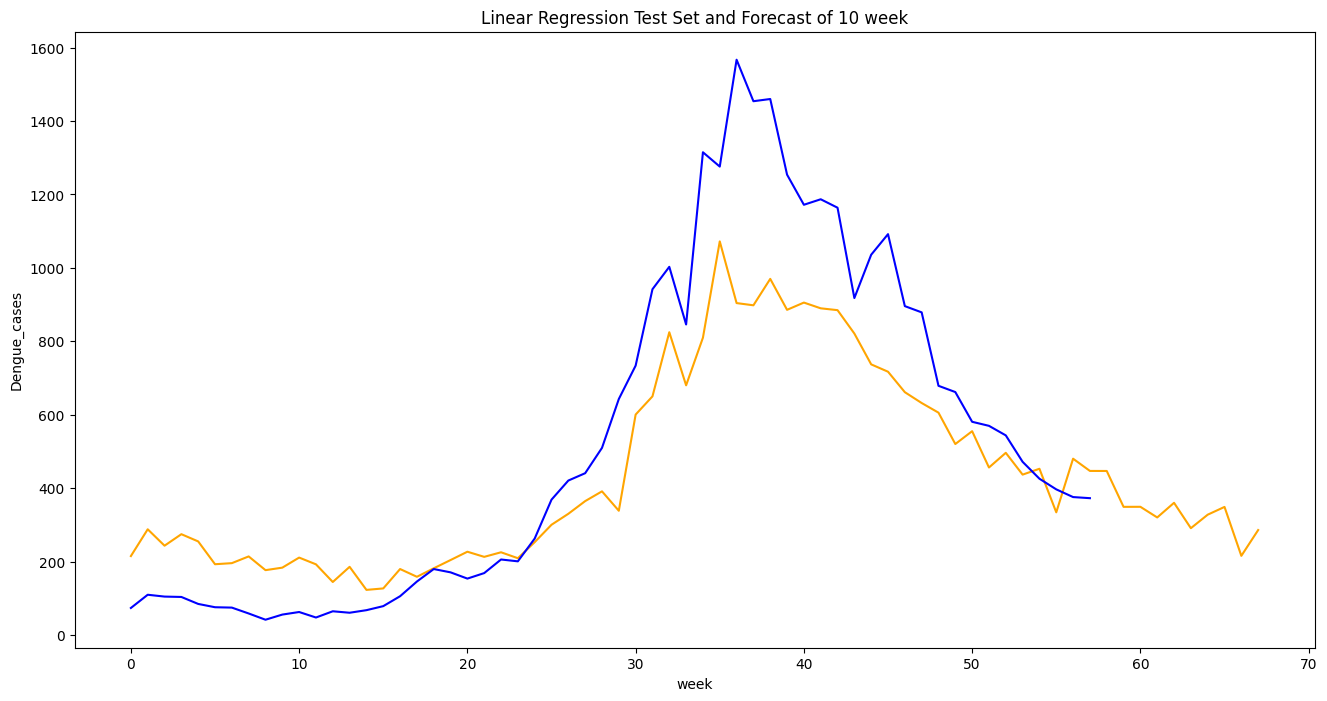

In [36]:
y_pred_lr_10week= model_lr.predict(df2X[504:572])

#plot
plt.figure(figsize=(16, 8))
plt.plot(y_pred_lr_10week,color='orange')
plt.plot(df3y[504:562],color='blue')
plt.title('Linear Regression Test Set and Forecast of 10 week')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Lasso model

Mean Squared Error: 45930.98983160287
Root Mean Squared Error : 214.31516472616414
r2 score:0.7763943818033834
MAE: 161.12729365029216
[46.80777860461023, 0.7521284562272993, 9.161377020400172]


Text(0, 0.5, 'Dengue_cases')

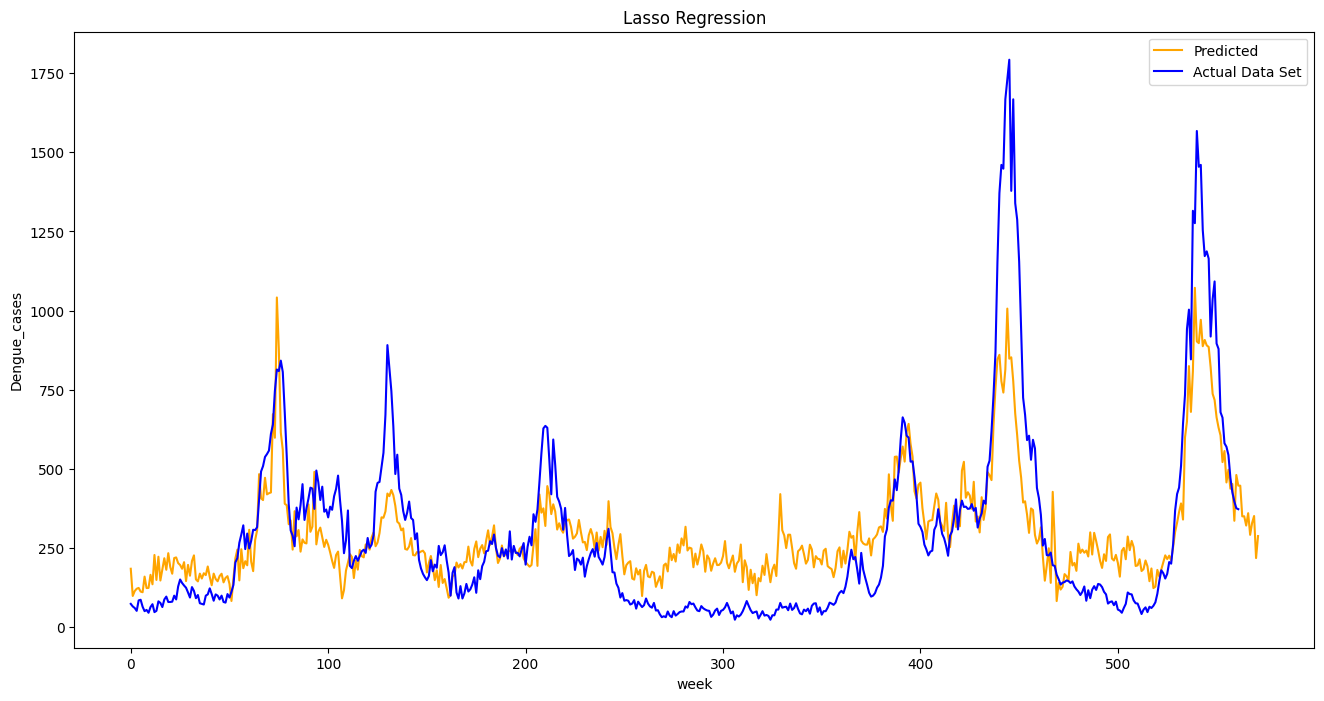

In [37]:
# Step 1 : Set columns for y and X

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall','interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

df2X=df2[['mean_temperature','total_rainfall', 'interest']].values  # Target variable
df2y=df2['dengue_cases'].values.reshape(-1, 1)
df3y=df3['dengue_cases'].values.reshape(-1, 1)

# Step 4: Make predictions on the test set
y_pred_lasso = model_lasso.predict(df2X[504:562])

#predict on unseen data
y_pred_lasso_10week= model_lasso.predict(df2X[0:572])
#y_pred_lasso_10week_show = model_lasso.predict(df2X[552:572])
#print(y_pred_lasso_10week_show)

# Step 5: Evaluate the model
mse_lasso = mean_squared_error(df3y[504:562], y_pred_lasso)
print(f'Mean Squared Error: {mse_lasso}')

rmse_lasso= np.sqrt(mse_lasso)
print(f'Root Mean Squared Error : {rmse_lasso}')

r2_lasso = r2_score(df3y[504:562], y_pred_lasso)
print(f'r2 score:{r2_lr}')

mae_lasso = mean_absolute_error(df3y[504:562], y_pred_lasso)
print(f'MAE: {mae_lasso}')


#coef
coef_lasso=list(model_lasso.coef_)
print(coef_lasso)

#plot
actual_pred_plot(df3['dengue_cases'],y_pred_lasso_10week,)
plt.title('Lasso Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Text(0, 0.5, 'Dengue_cases')

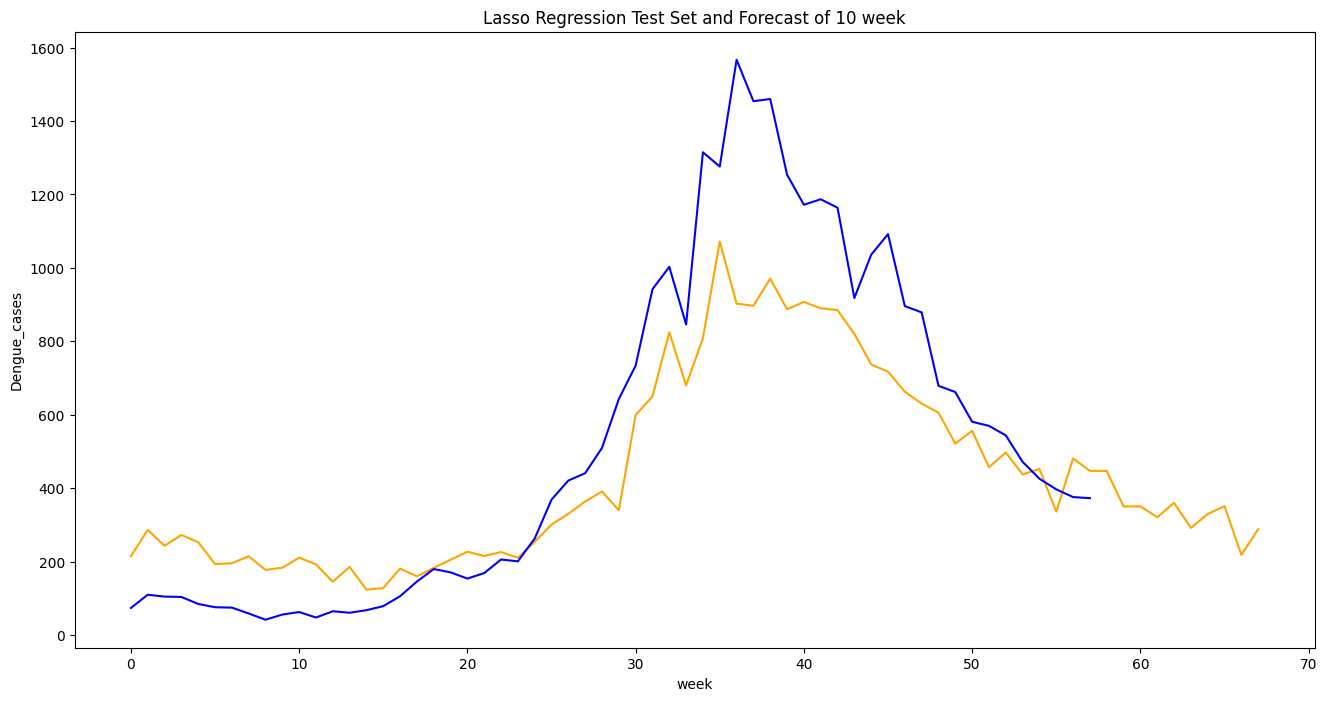

In [38]:
y_pred_lasso_10week= model_lasso.predict(df2X[504:572])

#plot
plt.figure(figsize=(16, 8))
plt.plot(y_pred_lasso_10week,color='orange')
plt.plot(df3y[504:562],color='blue')
plt.title('Lasso Regression Test Set and Forecast of 10 week')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Ridge model

Mean Squared Error: 45919.84895262177
Root Mean Squared Error : 214.2891713377551
r2 score:0.7763943818033834
MAE: 161.09958883955122
[array([48.32692099,  0.76567414,  9.14947537])]


Text(0, 0.5, 'Dengue_cases')

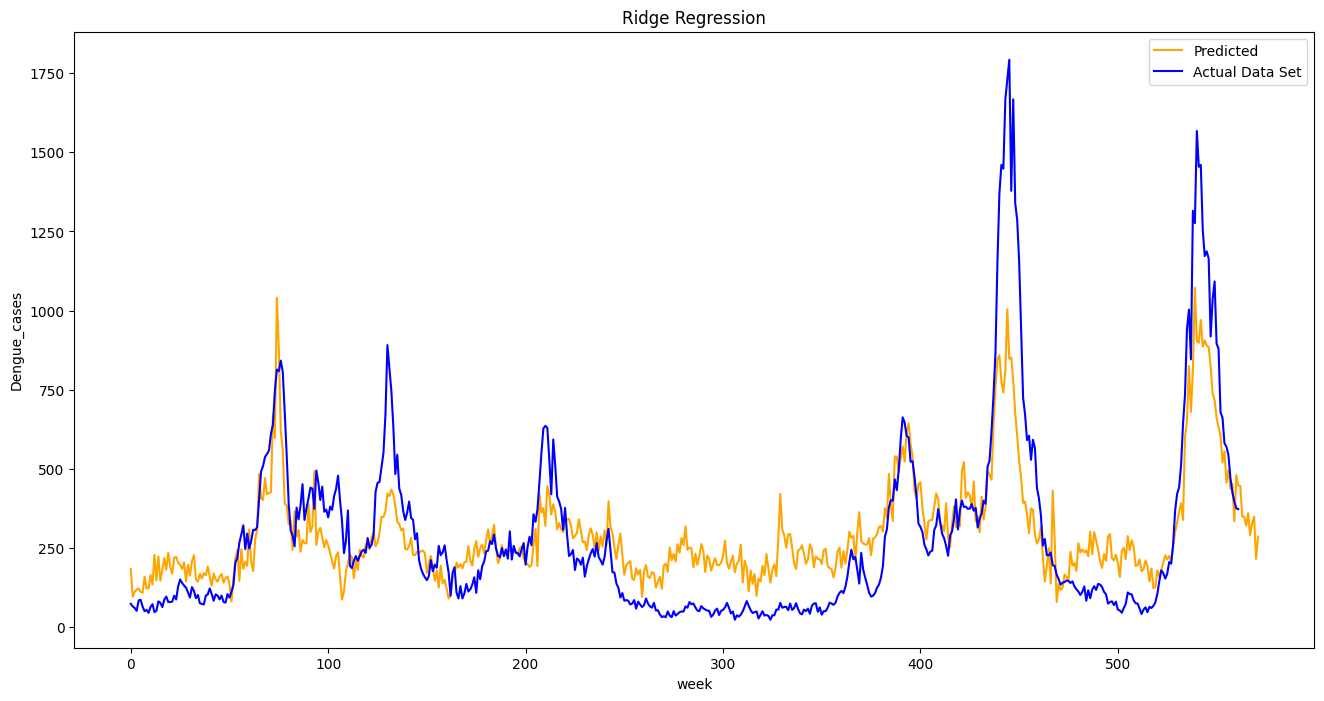

In [39]:
# Step 1 : Set columns for y and X
y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

df2X=df2[['mean_temperature','total_rainfall', 'interest']].values  # Target variable
df2y=df2['dengue_cases'].values.reshape(-1, 1)
df3y=df3['dengue_cases'].values.reshape(-1, 1)

# Step 4: Make predictions on the test set
y_pred_ridge = model_ridge.predict(df2X[504:562])


#predict on unseen data
y_pred_ridge_10week= model_ridge.predict(df2X[0:572])

# Step 5: Evaluate the model
mse_ridge = mean_squared_error(df3y[504:562], y_pred_ridge)
print(f'Mean Squared Error: {mse_ridge}')

rmse_ridge= np.sqrt(mse_ridge)
print(f'Root Mean Squared Error : {rmse_ridge}')

r2_ridge = r2_score(df3y[504:562], y_pred_ridge)
print(f'r2 score:{r2_lr}')

mae_ridge = mean_absolute_error(df3y[504:562], y_pred_ridge)
print(f'MAE: {mae_ridge}')


#coef
coef=list(model_ridge.coef_)
print(coef)

#plot


actual_pred_plot(df3['dengue_cases'],y_pred_ridge_10week,)
plt.title('Ridge Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Text(0, 0.5, 'Dengue_cases')

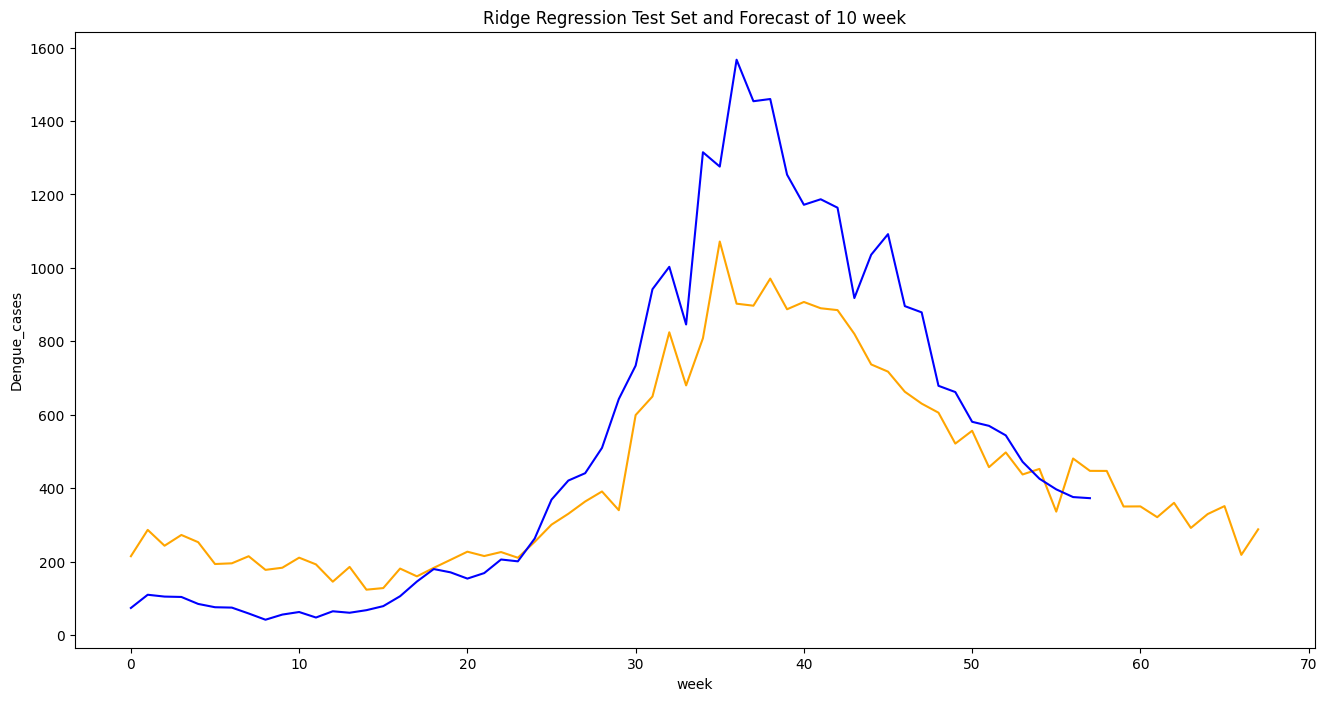

In [40]:
y_pred_ridge_10week= model_ridge.predict(df2X[504:572])

#plot
plt.figure(figsize=(16, 8))
plt.plot(y_pred_lasso_10week,color='orange')
plt.plot(df3y[504:562],color='blue')
plt.title('Ridge Regression Test Set and Forecast of 10 week')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### ARIMA MODEL

Testing ARIMA model with (1,0,0)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 271064.84777745244
Root Mean Squared Error : 520.6388842349872


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'Dengue_cases')

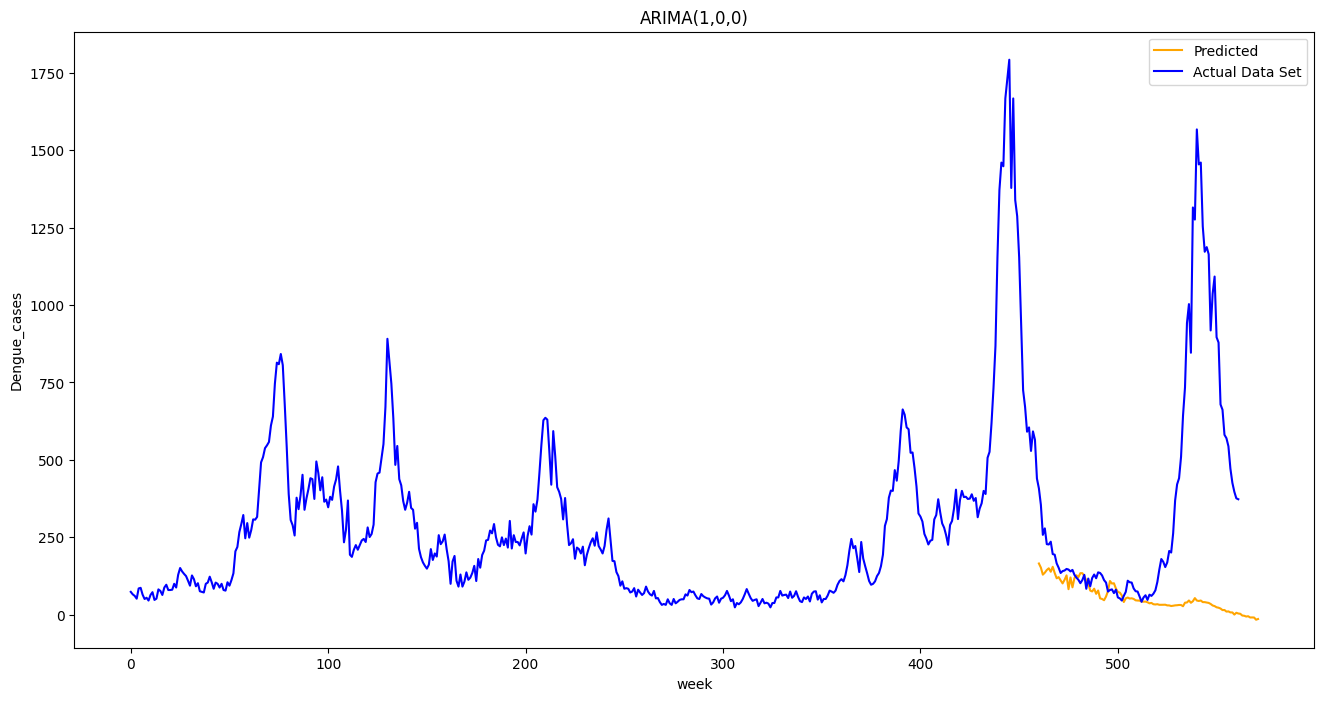

In [41]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(1, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions100 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions100)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions100)
plt.title(f'ARIMA(1,0,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Testing ARIMA model with (2,0,0)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 271983.065416407
Root Mean Squared Error : 521.5199568726081
AIC :5521.772788205714


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'Dengue_cases')

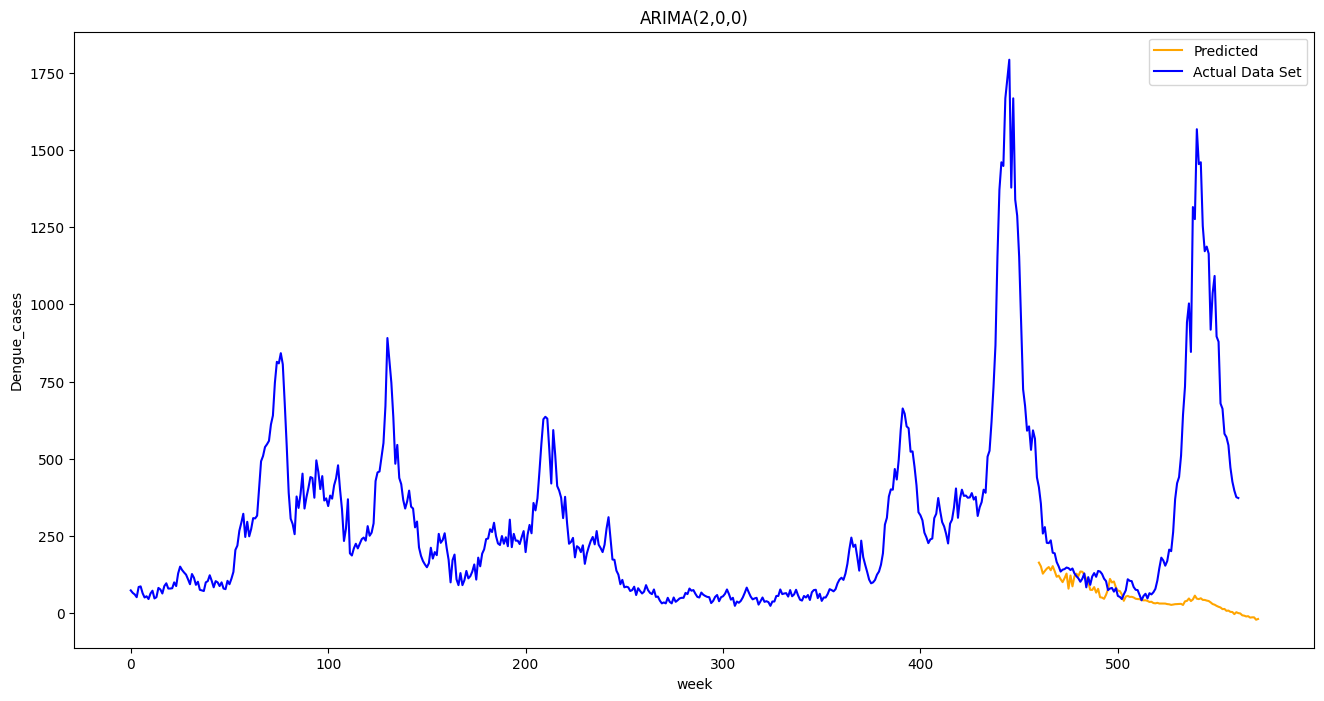

In [42]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(2, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions200 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions200)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions200)
plt.title(f'ARIMA(2,0,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Testing ARIMA model with (2,1,0)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 237570.88861845533
Root Mean Squared Error : 487.41244200210497
AIC :5451.719223035545


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'Dengue_cases')

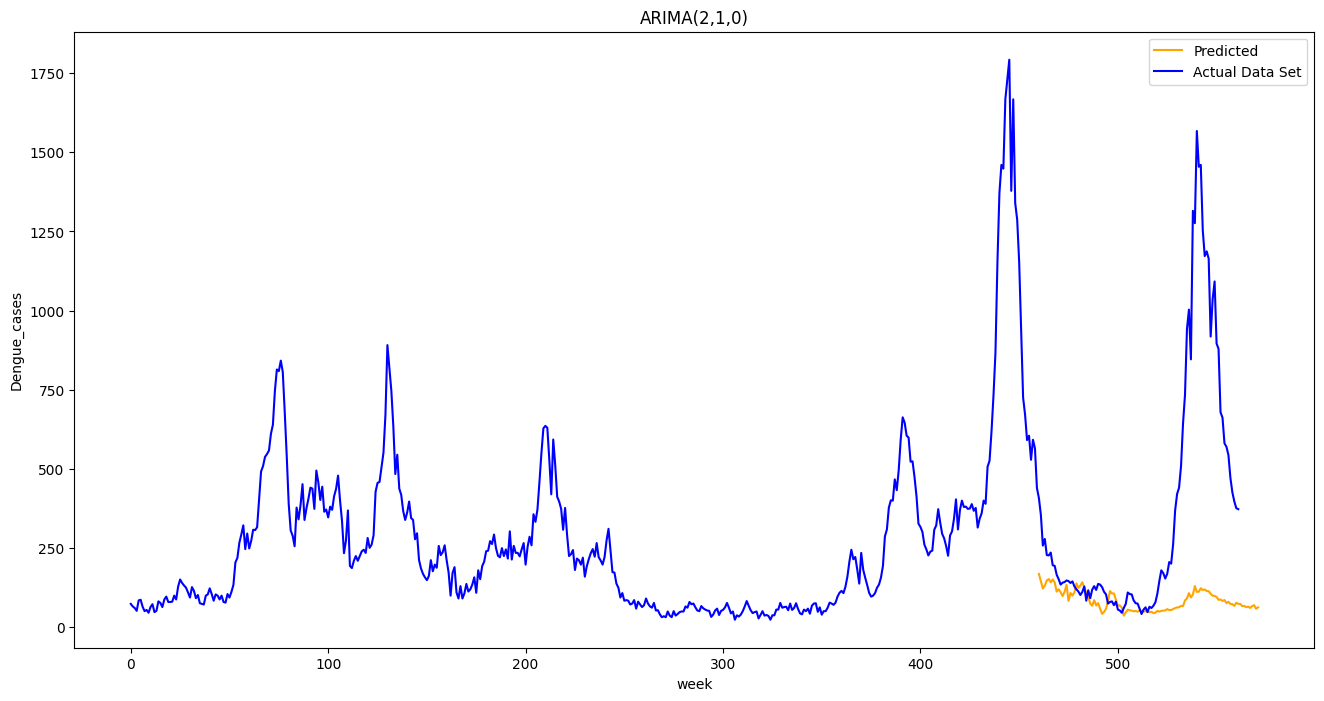

In [43]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(2, 1, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions210 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions210)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions210)
plt.title(f'ARIMA(2,1,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Gird search for ARIMA model Parameters. By best rmse

In [44]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

# Define ARIMA model parameters to search
p = [0,1, 2, 3]
d = [0, 1, 2]
q = [0, 1, 2]
params = list(product(p, d, q))

#train_data = df.iloc[:504]
#test_data = df.iloc[504:]


# Grid search to find optimal ARIMA model parameters
best_rmse = float('inf')
best_order = None
for param in params:
    try:
        model = ARIMA(endog=train_data['dengue_cases'], 
                      exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
                      order=param)  # ARIMA order: (p, d, q)
        model_fit = model.fit()
        predictions = model_fit.predict(start=504, 
                                        end=571, 
                                        exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])
        mse = mean_squared_error(test_data['dengue_cases'], predictions)
        rmse = np.sqrt(mse)
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = param
        print(f' best rmse {rmse}')
    except:
        continue

# Fit ARIMA model with best parameters
best_model = ARIMA(endog=train_data['dengue_cases'], 
                   exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
                   order=best_order)
best_model_fit = best_model.fit()

# Make predictions with best model
predictions = best_model_fit.predict(start=470, 
                                      end=571, 
                                      exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print best model parameters and predictions
print("Best ARIMA Order: ", best_order)
print("Predictions: ", predictions)

#mse = mean_squared_error(test_data['dengue_cases'], predictions)
#print(f'model mse: {mse}')

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 211.60928864902797
 best rmse 273.9693700741367


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py

 best rmse 319.8399934014561
 best rmse 596.106925666917


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 594.1798118102307


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 586.1666556696599
 best rmse 384.0275433706601


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 688.5914640220589


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 750.2858197078881


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 627.564961779278


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 627.5831800994825


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 599.4680794008493
 best rmse 592.9087089417046


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 591.3287414691044


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 590.1749815959798
 best rmse 562.1540885440427


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 743.3411045591288


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 733.149055059934


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 627.7904226985268


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 609.8053910969011


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 616.4278275808559


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 581.1959512963489


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 589.4509962312378


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 590.3429594323924
 best rmse 682.2111182311185


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 582.670873131076


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 738.0971279078353


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 642.6631556293311


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/statespac

 best rmse 669.0672635046947


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 638.237858200235


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 589.2197088372496


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 590.3616848965047


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 532.1532339583815


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 712.2572836822006


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 591.102715293778
 best rmse 581.3307026044931
Best ARIMA Order:  (0, 0, 0)
Predictions:  470    114.800513
471     97.277755
472    106.850862
473    148.886313
474    138.504312
          ...    
567    269.846553
568    302.864072
569    321.526850
570    191.755445
571    262.585079
Name: predicted_mean, Length: 102, dtype: float64


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

Fit best RMSE grid search ARIMA model

Mean Squared Error: 117262.28296789988
Root Mean Squared Error : 342.43580853628595
AIC :6894.883937531671


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'Dengue_cases')

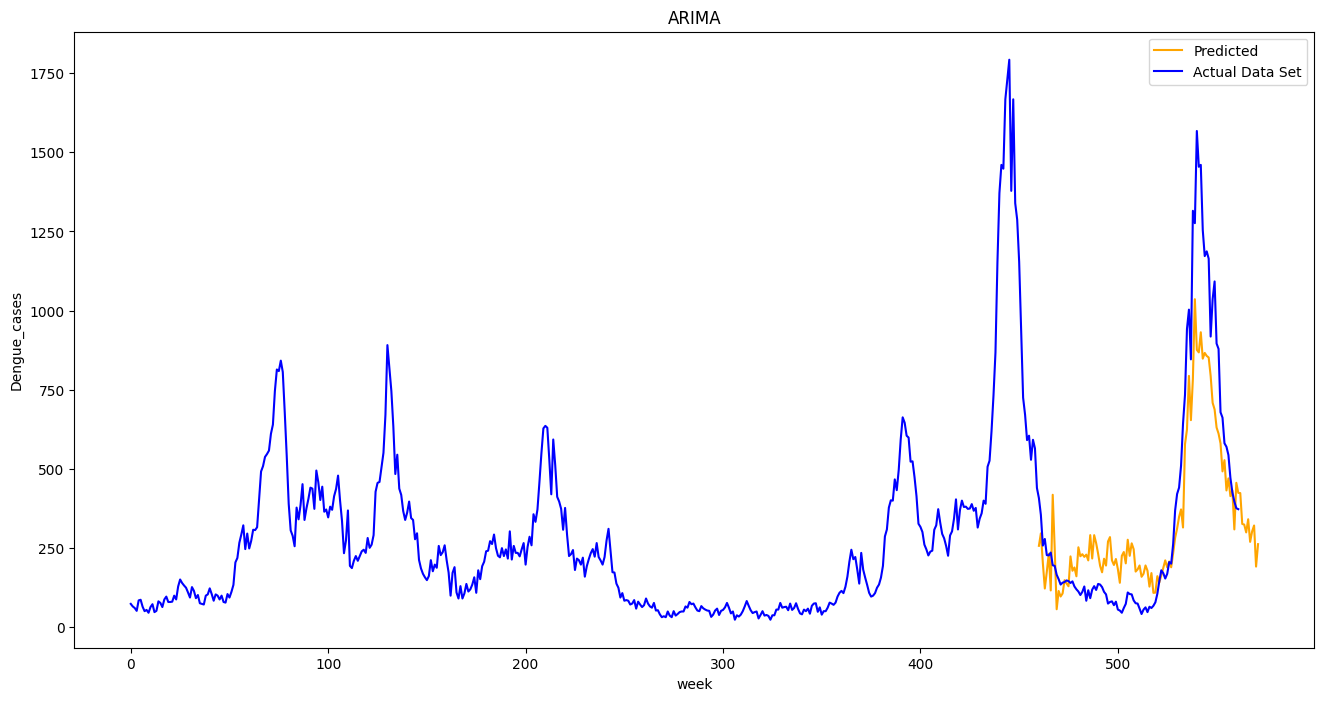

In [61]:
# Define ARIMA model best rmse parameter(0,0,1)
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]


# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(0, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions000 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse_000 = mean_squared_error(df3y[450:562], predictions000)
print(f'Mean Squared Error: {mse_000}')
rmse_000= np.sqrt(mse_000)
print(f'Root Mean Squared Error : {rmse_000}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions000)
plt.title(f'ARIMA')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

The ARIMA(0, 0, 0) model with all zero components represents a White Noise model with independent and identically distributed data.

### Gird search for ARIMA model Parameters. by best AIC

In [50]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_d = 0
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        for d in range(5):
                    try:
            
                        # Fitting an ARIMA(p, d, q) model.
                        print(f'Attempting ARIMA({p}, {d}, {q})')

                        # Instantiate ARIMA model.
                        arima = ARIMA(endog=train_data['dengue_cases'], 
                                      exog=train_data[['mean_temperature', 'total_rainfall', 'searches']], 
                                      order=(p, d, q))


                        # Fit ARIMA model.
                        model = arima.fit()#disp=False)

                        # Print out AIC for ARIMA(p, d, q) model.
                        print(f'The AIC for ARIMA({p},{d},{q}) is: {model.aic}')

                        # Is my current model's AIC better than our best_aic?
                        if model.aic < best_aic:

                            # If so, let's overwrite best_aic, best_p, and best_q.
                            best_aic = model.aic
                            best_p = p
                            best_q = q
                            best_d = d


                    except:
                        pass
            

#print()
#print()
print('MODEL FINISHED!')

print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 0, 0)
Attempting ARIMA(0, 1, 0)
Attempting ARIMA(0, 2, 0)
Attempting ARIMA(0, 3, 0)
Attempting ARIMA(0, 4, 0)
Attempting ARIMA(0, 0, 1)
Attempting ARIMA(0, 1, 1)
Attempting ARIMA(0, 2, 1)
Attempting ARIMA(0, 3, 1)
Attempting ARIMA(0, 4, 1)
Attempting ARIMA(0, 0, 2)
Attempting ARIMA(0, 1, 2)
Attempting ARIMA(0, 2, 2)
Attempting ARIMA(0, 3, 2)
Attempting ARIMA(0, 4, 2)
Attempting ARIMA(0, 0, 3)
Attempting ARIMA(0, 1, 3)
Attempting ARIMA(0, 2, 3)
Attempting ARIMA(0, 3, 3)
Attempting ARIMA(0, 4, 3)
Attempting ARIMA(0, 0, 4)
Attempting ARIMA(0, 1, 4)
Attempting ARIMA(0, 2, 4)
Attempting ARIMA(0, 3, 4)
Attempting ARIMA(0, 4, 4)
Attempting ARIMA(1, 0, 0)
Attempting ARIMA(1, 1, 0)
Attempting ARIMA(1, 2, 0)
Attempting ARIMA(1, 3, 0)
Attempting ARIMA(1, 4, 0)
Attempting ARIMA(1, 0, 1)
Attempting ARIMA(1, 1, 1)
Attempting ARIMA(1, 2, 1)
Attempting ARIMA(1, 3, 1)
Attempting ARIMA(1, 4, 1)
Attempting ARIMA(1, 0, 2)
Attempting ARIMA(1, 1, 2)
Attempting ARIMA(1, 2, 2)
Attempting A

Fit best AIC grid search ARIMA model

Mean Squared Error: 245246.47695911402
Root Mean Squared Error : 495.2236635694159
AIC :5500.175751637588


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'Dengue_cases')

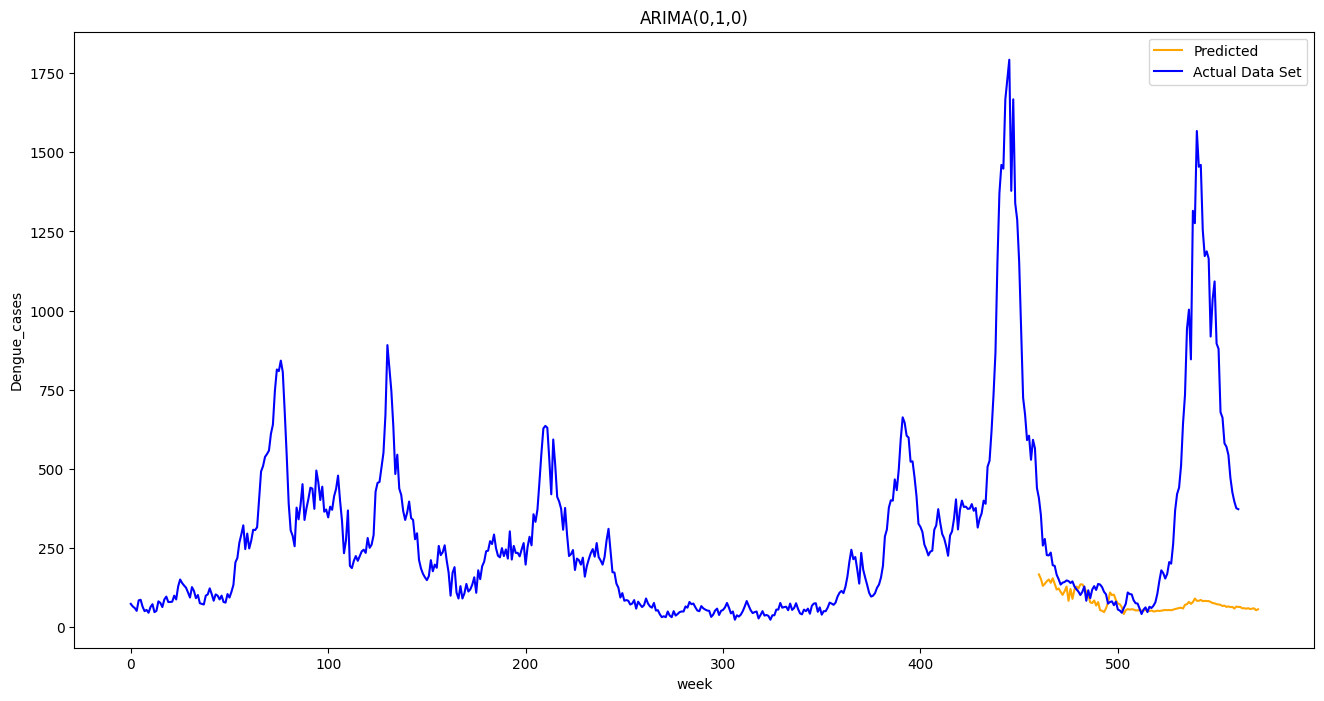

In [60]:
# Define ARIMA model best rmse parameter(0,1,0)
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]


# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(0, 1, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions010 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions010)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions010)
plt.title(f'ARIMA(0,1,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Check for seasonal 

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


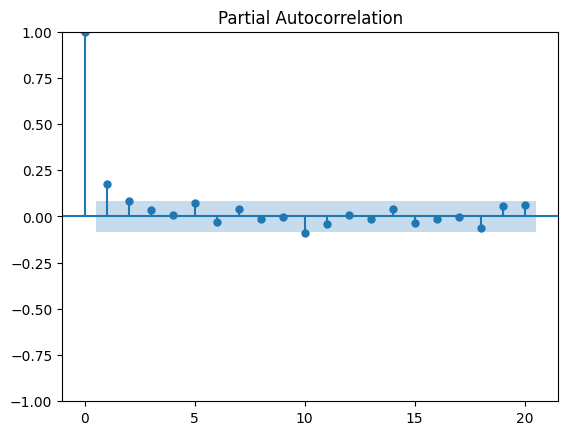

In [52]:
plot_pacf(df['total_rainfall'],lags=20);

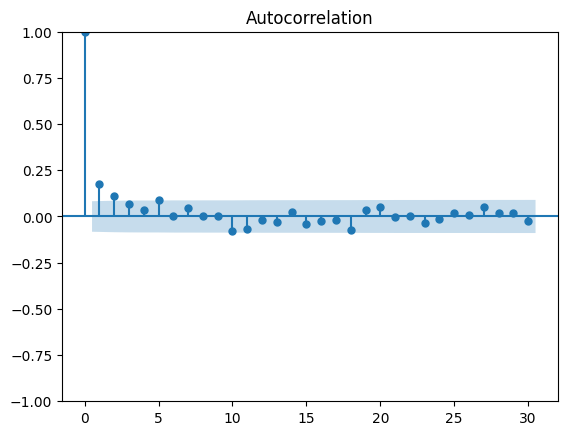

In [53]:
plot_acf(df['total_rainfall'],lags=30);

no seasonality is found

### Fit SARIMA Model

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


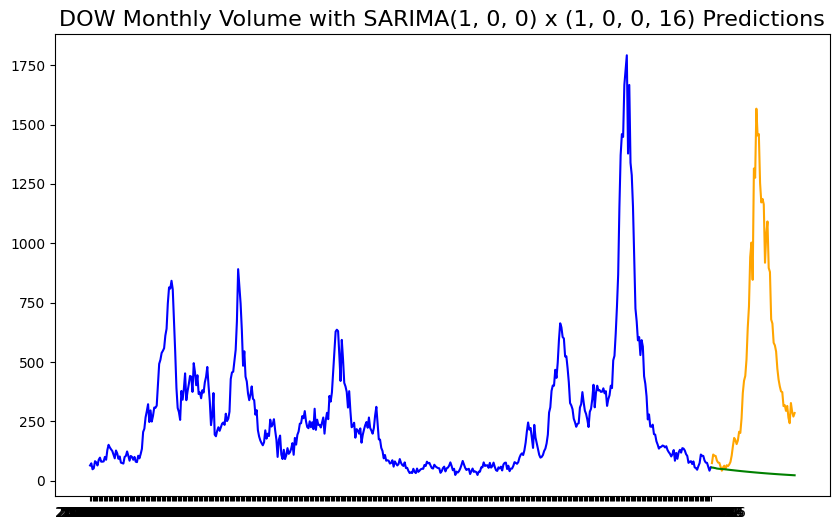

In [57]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 13) model.
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

#Split the data into training and testing sets

sarima = SARIMAX(endog = train_data['dengue_cases'],
                 order = (1, 0, 0),              # (p, d, q)
                 seasonal_order = (1, 0, 0, 13)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=len(train_data), 
                              end=len(train_data) + len(test_data) - 1,)

# Evaluate predictions.
#print(mean_squared_error(test['dengue_cases'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train_data['dengue_cases'], color = 'blue')
plt.plot(test_data['dengue_cases'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'DOW Monthly Volume with SARIMA(1, 0, 0) x (1, 0, 0, 16) Predictions', fontsize=16)
plt.show();

Try search for best parameter for SARIMAX

In [62]:
def sarimax(ts,exo,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                          exog = exo,
                          order=param[0],
                          seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

# set parameter range
p,d,q = range(1,3),[1],range(1,3)
P,D,Q,s = range(0,3),[1],range(0,3),[30]
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))
all_param = list(itertools.product(pdq,seasonal_pdq))

all_res = sarimax(train_data['dengue_cases'],train_data[['mean_temperature', 'total_rainfall', 'interest']],all_param)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46738D+00    |proj g|=  1.34994D-01

At iterate    5    f=  5.45026D+00    |proj g|=  2.08835D-02

At iterate   10    f=  5.44864D+00    |proj g|=  3.32917D-04

At iterate   15    f=  5.44852D+00    |proj g|=  1.85503D-03

At iterate   20    f=  5.44830D+00    |proj g|=  1.15722D-03

At iterate   25    f=  5.44829D+00    |proj g|=  7.45686D-04

At iterate   30    f=  5.44822D+00    |proj g|=  1.39581D-03

At iterate   35    f=  5.44822D+00    |proj g|=  5.35705D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28180D+00    |proj g|=  7.75619D-02

At iterate    5    f=  5.26675D+00    |proj g|=  2.35787D-02

At iterate   10    f=  5.22725D+00    |proj g|=  9.41573D-02

At iterate   15    f=  5.21127D+00    |proj g|=  1.44956D-03

At iterate   20    f=  5.21035D+00    |proj g|=  2.66604D-03

At iterate   25    f=  5.20884D+00    |proj g|=  2.00150D-03

At iterate   30    f=  5.20862D+00    |proj g|=  8.24646D-05

At iterate   35    f=  5.20734D+00    |proj g|=  1.61630D-02
  ys=-2.220E-03  -gs= 2.370E-04 BFGS update SKIPPED

At iterate   40    f=  5.20628D+00    |proj g|=  5.90910D-03

At iterate   45    f=  5.20592D+00    |proj g|=  4.60675D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.20552D+00    |proj g|=  1.58161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     76      1     1     0   1.582D-03   5.206D+00
  F =   5.2055169305390372     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 1)x(0, 1, 1, 30) - AIC:5261.16


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28813D+00    |proj g|=  7.85218D-02

At iterate    5    f=  5.26723D+00    |proj g|=  3.23813D-02

At iterate   10    f=  5.26137D+00    |proj g|=  2.08443D-02

At iterate   15    f=  5.24628D+00    |proj g|=  8.97286D-02

At iterate   20    f=  5.19780D+00    |proj g|=  1.81682D-02

At iterate   25    f=  5.18024D+00    |proj g|=  8.99845D-03

At iterate   30    f=  5.17747D+00    |proj g|=  1.36034D-02

At iterate   35    f=  5.17698D+00    |proj g|=  1.14383D-03

At iterate   40    f=  5.17696D+00    |proj g|=  1.19965D-03

At iterate   45    f=  5.17685D+00    |proj g|=  5.84016D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.17665D+00    |proj g|=  6.84198D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   6.842D-04   5.177D+00
  F =   5.1766492981228547     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 1)x(0, 1, 2, 30) - AIC:5234.06


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34917D+00    |proj g|=  9.95841D-02

At iterate    5    f=  5.33590D+00    |proj g|=  1.14452D-02

At iterate   10    f=  5.33439D+00    |proj g|=  3.54360D-03

At iterate   15    f=  5.33035D+00    |proj g|=  2.12372D-02

At iterate   20    f=  5.31464D+00    |proj g|=  8.04201D-03

At iterate   25    f=  5.31111D+00    |proj g|=  3.19608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27980D+00    |proj g|=  8.10287D-02


 This problem is unconstrained.



At iterate    5    f=  5.26533D+00    |proj g|=  1.22794D-02

At iterate   10    f=  5.25849D+00    |proj g|=  1.74201D-02

At iterate   15    f=  5.22570D+00    |proj g|=  1.49511D-02

At iterate   20    f=  5.21163D+00    |proj g|=  5.39428D-02

At iterate   25    f=  5.20815D+00    |proj g|=  8.50775D-04

At iterate   30    f=  5.20737D+00    |proj g|=  8.95438D-03

At iterate   35    f=  5.20507D+00    |proj g|=  1.44081D-03

At iterate   40    f=  5.20498D+00    |proj g|=  7.29464D-05

At iterate   45    f=  5.20498D+00    |proj g|=  8.40590D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.20455D+00    |proj g|=  9.84988D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69      1     0     0   9.850D-03   5.205D+00
  F =   5.2045547815068858     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 1)x(1, 1, 1, 30) - AIC:5262.19


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29395D+00    |proj g|=  7.70666D-02


 This problem is unconstrained.



At iterate    5    f=  5.27112D+00    |proj g|=  6.68013D-02

At iterate   10    f=  5.26307D+00    |proj g|=  5.48990D-03

At iterate   15    f=  5.23782D+00    |proj g|=  1.22028D-01

At iterate   20    f=  5.21053D+00    |proj g|=  1.20428D-02

At iterate   25    f=  5.20313D+00    |proj g|=  1.94981D-03

At iterate   30    f=  5.19792D+00    |proj g|=  2.94782D-02

At iterate   35    f=  5.17818D+00    |proj g|=  1.51257D-02

At iterate   40    f=  5.17696D+00    |proj g|=  1.47534D-03

At iterate   45    f=  5.17661D+00    |proj g|=  8.77177D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.17654D+00    |proj g|=  5.69344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   5.693D-04   5.177D+00
  F =   5.1765402121060466     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 1)x(1, 1, 2, 30) - AIC:5235.95


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30490D+00    |proj g|=  9.34446D-02

At iterate    5    f=  5.29008D+00    |proj g|=  1.45223D-02

At iterate   10    f=  5.28737D+00    |proj g|=  4.93173D-03

At iterate   15    f=  5.27567D+00    |proj g|=  1.42563D-02

At iterate   20    f=  5.25814D+00    |proj g|=  1.14895D-02

At iterate   25    f=  5.24387D+00    |proj g|=  3.93541D-02

At iterate   30    f=  5.23408D+00    |proj g|=  4.91777D-03

At iterate   35    f=  5.23405D+00    |proj g|=  2.05314D-04

At iterate   40    f=  5.23405D+00    |proj g|=  1.19504D-03

At iterate   45    f=  5.23402D+00    |proj g|=  6.99086D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28594D+00    |proj g|=  8.69169D-02

At iterate    5    f=  5.26486D+00    |proj g|=  3.93159D-02

At iterate   10    f=  5.26031D+00    |proj g|=  1.28637D-02

At iterate   15    f=  5.22302D+00    |proj g|=  2.73586D-02

At iterate   20    f=  5.20708D+00    |proj g|=  1.27102D-03

At iterate   25    f=  5.20686D+00    |proj g|=  2.19179D-03

At iterate   30    f=  5.20408D+00    |proj g|=  1.56196D-02

At iterate   35    f=  5.20216D+00    |proj g|=  3.76739D-03

At iterate   40    f=  5.20214D+00    |proj g|=  2.65302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28547D+00    |proj g|=  8.24538D-02

At iterate    5    f=  5.26526D+00    |proj g|=  9.99837D-03

At iterate   10    f=  5.25865D+00    |proj g|=  8.94400D-03

At iterate   15    f=  5.22253D+00    |proj g|=  1.71752D-02

At iterate   20    f=  5.20974D+00    |proj g|=  1.12916D-02

At iterate   25    f=  5.20514D+00    |proj g|=  7.81639D-03

At iterate   30    f=  5.20477D+00    |proj g|=  1.77095D-03

At iterate   35    f=  5.20365D+00    |proj g|=  9.14149D-03

At iterate   40    f=  5.20140D+00    |proj g|=  7.66876D-03

At iterate   45    f=  5.20122D+00    |proj g|=  3.41498D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.20012D+00    |proj g|=  6.43974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   6.440D-03   5.200D+00
  F =   5.2001246276642421     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 1)x(2, 1, 2, 30) - AIC:5261.73
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42832D+00    |proj g|=  3.69974D-02


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.42652D+00    |proj g|=  1.61383D-02

At iterate   10    f=  5.42625D+00    |proj g|=  1.21750D-03

At iterate   15    f=  5.42621D+00    |proj g|=  2.45860D-04

At iterate   20    f=  5.42620D+00    |proj g|=  1.91105D-03

At iterate   25    f=  5.42612D+00    |proj g|=  1.92336D-03

At iterate   30    f=  5.42611D+00    |proj g|=  3.78455D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     34      1     0     0   1.146D-05   5.426D+00
  F =   5.4261106494794111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Tried out SARIMAX(1, 1, 2)x(0, 1, 0, 30) - AIC:5483

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24415D+00    |proj g|=  3.62332D-02

At iterate    5    f=  5.23804D+00    |proj g|=  1.85159D-02

At iterate   10    f=  5.23069D+00    |proj g|=  3.27430D-02

At iterate   15    f=  5.17148D+00    |proj g|=  7.27707D-02

At iterate   20    f=  5.15199D+00    |proj g|=  1.31868D-02

At iterate   25    f=  5.14764D+00    |proj g|=  2.86626D-03

At iterate   30    f=  5.14751D+00    |proj g|=  1.02465D-03

At iterate   35    f=  5.14744D+00    |proj g|=  6.41508D-03

At iterate   40    f=  5.14741D+00    |proj g|=  3.03834D-04

At iterate   45    f=  5.14739D+00    |proj g|=  1.79772D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14721D+00    |proj g|=  6.34543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   6.345D-03   5.147D+00
  F =   5.1472050704629355     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 2)x(0, 1, 1, 30) - AIC:5204.38


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24911D+00    |proj g|=  4.05213D-02

At iterate    5    f=  5.23803D+00    |proj g|=  4.55822D-02

At iterate   10    f=  5.23223D+00    |proj g|=  1.62713D-02

At iterate   15    f=  5.19075D+00    |proj g|=  6.51734D-02

At iterate   20    f=  5.17408D+00    |proj g|=  6.28795D-02

At iterate   25    f=  5.14932D+00    |proj g|=  1.13555D-02

At iterate   30    f=  5.14549D+00    |proj g|=  6.94123D-03

At iterate   35    f=  5.14522D+00    |proj g|=  1.44720D-03

At iterate   40    f=  5.14518D+00    |proj g|=  2.75717D-04

At iterate   45    f=  5.14518D+00    |proj g|=  2.63848D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14516D+00    |proj g|=  1.37818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     54      1     0     0   1.378D-03   5.145D+00
  F =   5.1451637740275480     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 2)x(0, 1, 2, 30) - AIC:5204.33


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31397D+00    |proj g|=  3.83946D-02

At iterate    5    f=  5.31149D+00    |proj g|=  1.18411D-02

At iterate   10    f=  5.31048D+00    |proj g|=  8.81123D-03

At iterate   15    f=  5.30361D+00    |proj g|=  1.82964D-02

At iterate   20    f=  5.29465D+00    |proj g|=  3.64043D-02

At iterate   25    f=  5.28829D+00    |proj g|=  9.24937D-03

At iterate   30    f=  5.28814D+00    |proj g|=  3.66203D-04

At iterate   35    f=  5.28814D+00    |proj g|=  1.32641D-04

At iterate   40    f=  5.28814D+00    |proj g|=  6.10791D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24258D+00    |proj g|=  3.37218D-02


 This problem is unconstrained.



At iterate    5    f=  5.23734D+00    |proj g|=  5.83184D-03

At iterate   10    f=  5.22911D+00    |proj g|=  2.76393D-02

At iterate   15    f=  5.18709D+00    |proj g|=  5.68498D-02

At iterate   20    f=  5.15242D+00    |proj g|=  9.77411D-03

At iterate   25    f=  5.14626D+00    |proj g|=  7.08802D-03

At iterate   30    f=  5.14587D+00    |proj g|=  9.72954D-03

At iterate   35    f=  5.14557D+00    |proj g|=  2.63859D-04

At iterate   40    f=  5.14556D+00    |proj g|=  5.16511D-04

At iterate   45    f=  5.14550D+00    |proj g|=  6.62187D-04

At iterate   50    f=  5.14534D+00    |proj g|=  6.65593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tried out SARIMAX(1, 1, 2)x(1, 1, 1, 30) - AIC:5204.5


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25535D+00    |proj g|=  4.00372D-02


 This problem is unconstrained.



At iterate    5    f=  5.23931D+00    |proj g|=  3.97216D-02

At iterate   10    f=  5.23452D+00    |proj g|=  1.68355D-02

At iterate   15    f=  5.20406D+00    |proj g|=  2.58794D-02

At iterate   20    f=  5.16718D+00    |proj g|=  4.70787D-02

At iterate   25    f=  5.15416D+00    |proj g|=  4.12435D-02

At iterate   30    f=  5.14638D+00    |proj g|=  4.88971D-03

At iterate   35    f=  5.14556D+00    |proj g|=  6.02234D-04

At iterate   40    f=  5.14555D+00    |proj g|=  4.35066D-04

At iterate   45    f=  5.14542D+00    |proj g|=  9.00097D-03

At iterate   50    f=  5.14461D+00    |proj g|=  5.78042D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tried out SARIMAX(1, 1, 2)x(1, 1, 2, 30) - AIC:5205.77


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26529D+00    |proj g|=  2.90179D-02

At iterate    5    f=  5.26160D+00    |proj g|=  1.50856D-02

At iterate   10    f=  5.25938D+00    |proj g|=  9.94808D-03

At iterate   15    f=  5.24310D+00    |proj g|=  3.25152D-02

At iterate   20    f=  5.22260D+00    |proj g|=  2.42935D-02

At iterate   25    f=  5.20999D+00    |proj g|=  9.13014D-02

At iterate   30    f=  5.20463D+00    |proj g|=  2.16749D-04

At iterate   35    f=  5.20463D+00    |proj g|=  1.54151D-03

At iterate   40    f=  5.20449D+00    |proj g|=  1.74756D-03

At iterate   45    f=  5.20447D+00    |proj g|=  1.40581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24679D+00    |proj g|=  4.17740D-02


 This problem is unconstrained.



At iterate    5    f=  5.23491D+00    |proj g|=  1.04949D-02

At iterate   10    f=  5.23106D+00    |proj g|=  1.79847D-02

At iterate   15    f=  5.19765D+00    |proj g|=  3.78568D-02

At iterate   20    f=  5.17389D+00    |proj g|=  6.25003D-02

At iterate   25    f=  5.14539D+00    |proj g|=  9.68456D-03

At iterate   30    f=  5.14297D+00    |proj g|=  1.59661D-02

At iterate   35    f=  5.14226D+00    |proj g|=  1.58351D-03

At iterate   40    f=  5.14223D+00    |proj g|=  2.67678D-04

At iterate   45    f=  5.14220D+00    |proj g|=  2.91938D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14200D+00    |proj g|=  1.88066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.881D-03   5.142D+00
  F =   5.1419992848043510     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 2)x(2, 1, 1, 30) - AIC:5203.14


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24545D+00    |proj g|=  6.52197D-02

At iterate    5    f=  5.23631D+00    |proj g|=  1.01657D-02

At iterate   10    f=  5.22972D+00    |proj g|=  8.73369D-03

At iterate   15    f=  5.19866D+00    |proj g|=  2.26550D-02

At iterate   20    f=  5.16571D+00    |proj g|=  7.86428D-02

At iterate   25    f=  5.14969D+00    |proj g|=  2.86574D-02

At iterate   30    f=  5.14521D+00    |proj g|=  2.49215D-03

At iterate   35    f=  5.14429D+00    |proj g|=  5.43807D-03

At iterate   40    f=  5.14388D+00    |proj g|=  1.32094D-03

At iterate   45    f=  5.14384D+00    |proj g|=  5.54389D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14380D+00    |proj g|=  7.11137D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   7.111D-04   5.144D+00
  F =   5.1437998813025416     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(1, 1, 2)x(2, 1, 2, 30) - AIC:5206.95
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42587D+00    |proj g|=  3.08861D-02


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.42532D+00    |proj g|=  6.69159D-03

At iterate   10    f=  5.42517D+00    |proj g|=  3.18518D-04

At iterate   15    f=  5.42517D+00    |proj g|=  1.62549D-04

At iterate   20    f=  5.42516D+00    |proj g|=  1.49138D-03

At iterate   25    f=  5.42514D+00    |proj g|=  9.64893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     32      1     0     0   2.471D-05   5.425D+00
  F =   5.4251419961785672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Tried out SARIMAX(2, 1, 1)x(0, 1, 0, 30) - AIC:5482.54


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24041D+00    |proj g|=  3.48268D-02


 This problem is unconstrained.



At iterate    5    f=  5.23497D+00    |proj g|=  2.97222D-02

At iterate   10    f=  5.22617D+00    |proj g|=  4.55205D-02

At iterate   15    f=  5.18729D+00    |proj g|=  4.42347D-02

At iterate   20    f=  5.16332D+00    |proj g|=  2.43426D-02

At iterate   25    f=  5.14901D+00    |proj g|=  2.81854D-02

At iterate   30    f=  5.14718D+00    |proj g|=  4.72753D-04

At iterate   35    f=  5.14714D+00    |proj g|=  2.73770D-03

At iterate   40    f=  5.14710D+00    |proj g|=  4.09238D-04

At iterate   45    f=  5.14708D+00    |proj g|=  1.81065D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14688D+00    |proj g|=  1.46443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   1.464D-03   5.147D+00
  F =   5.1468818787746891     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 1)x(0, 1, 1, 30) - AIC:5204.06


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24543D+00    |proj g|=  3.96407D-02


 This problem is unconstrained.



At iterate    5    f=  5.23456D+00    |proj g|=  4.28970D-02

At iterate   10    f=  5.22539D+00    |proj g|=  2.38882D-02

At iterate   15    f=  5.18012D+00    |proj g|=  2.53568D-02

At iterate   20    f=  5.14976D+00    |proj g|=  2.45515D-02

At iterate   25    f=  5.14504D+00    |proj g|=  6.23390D-03

At iterate   30    f=  5.14498D+00    |proj g|=  6.82999D-04

At iterate   35    f=  5.14497D+00    |proj g|=  9.93513D-04

At iterate   40    f=  5.14487D+00    |proj g|=  2.61002D-03

At iterate   45    f=  5.14470D+00    |proj g|=  2.47102D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14470D+00    |proj g|=  2.10109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   2.101D-04   5.145D+00
  F =   5.1446961031247325     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 1)x(0, 1, 2, 30) - AIC:5203.85


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31159D+00    |proj g|=  3.48493D-02

At iterate    5    f=  5.30963D+00    |proj g|=  9.33421D-03

At iterate   10    f=  5.30778D+00    |proj g|=  9.19162D-03

At iterate   15    f=  5.30285D+00    |proj g|=  1.62938D-02

At iterate   20    f=  5.29155D+00    |proj g|=  3.57790D-02

At iterate   25    f=  5.28809D+00    |proj g|=  7.10620D-03

At iterate   30    f=  5.28800D+00    |proj g|=  1.13017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23916D+00    |proj g|=  3.21325D-02


 This problem is unconstrained.



At iterate    5    f=  5.23401D+00    |proj g|=  5.78481D-03

At iterate   10    f=  5.22104D+00    |proj g|=  2.66368D-02

At iterate   15    f=  5.17783D+00    |proj g|=  4.17591D-02

At iterate   20    f=  5.15573D+00    |proj g|=  6.21848D-02

At iterate   25    f=  5.14571D+00    |proj g|=  1.13882D-03

At iterate   30    f=  5.14545D+00    |proj g|=  6.18653D-03

At iterate   35    f=  5.14536D+00    |proj g|=  2.91577D-04

At iterate   40    f=  5.14535D+00    |proj g|=  7.46017D-04

At iterate   45    f=  5.14525D+00    |proj g|=  5.13132D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14514D+00    |proj g|=  4.26120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   4.261D-03   5.145D+00
  F =   5.1451385967801171     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 1)x(1, 1, 1, 30) - AIC:5204.3


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25163D+00    |proj g|=  3.91443D-02


 This problem is unconstrained.



At iterate    5    f=  5.23463D+00    |proj g|=  3.10303D-02

At iterate   10    f=  5.23016D+00    |proj g|=  1.73590D-02

At iterate   15    f=  5.19208D+00    |proj g|=  1.79465D-02

At iterate   20    f=  5.15841D+00    |proj g|=  2.15854D-02

At iterate   25    f=  5.14518D+00    |proj g|=  1.20430D-02

At iterate   30    f=  5.14490D+00    |proj g|=  2.18144D-03

At iterate   35    f=  5.14485D+00    |proj g|=  6.66947D-04

At iterate   40    f=  5.14475D+00    |proj g|=  2.32922D-03

At iterate   45    f=  5.14388D+00    |proj g|=  4.26107D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14369D+00    |proj g|=  1.87452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   1.875D-04   5.144D+00
  F =   5.1436916190088660     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 1)x(1, 1, 2, 30) - AIC:5204.84


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26215D+00    |proj g|=  2.71348D-02

At iterate    5    f=  5.25919D+00    |proj g|=  1.28692D-02

At iterate   10    f=  5.25136D+00    |proj g|=  1.19902D-02

At iterate   15    f=  5.24061D+00    |proj g|=  5.53809D-02

At iterate   20    f=  5.22343D+00    |proj g|=  5.26280D-02

At iterate   25    f=  5.20531D+00    |proj g|=  2.05141D-03

At iterate   30    f=  5.20522D+00    |proj g|=  1.70085D-04

At iterate   35    f=  5.20521D+00    |proj g|=  7.24066D-04

At iterate   40    f=  5.20517D+00    |proj g|=  3.54120D-03

At iterate   45    f=  5.20512D+00    |proj g|=  7.47274D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.20512D+00    |proj g|=  5.56619D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   5.566D-04   5.205D+00
  F =   5.2051210349988333     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 1)x(2, 1, 0, 30) - AIC:5264.76


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24332D+00    |proj g|=  4.38690D-02

At iterate    5    f=  5.23168D+00    |proj g|=  9.73952D-03

At iterate   10    f=  5.22754D+00    |proj g|=  2.03967D-02

At iterate   15    f=  5.20801D+00    |proj g|=  3.36729D-02

At iterate   20    f=  5.15894D+00    |proj g|=  1.90340D-02

At iterate   25    f=  5.14605D+00    |proj g|=  6.30817D-03

At iterate   30    f=  5.14594D+00    |proj g|=  2.20724D-03

At iterate   35    f=  5.14522D+00    |proj g|=  3.63641D-02

At iterate   40    f=  5.14200D+00    |proj g|=  1.60695D-03

At iterate   45    f=  5.14190D+00    |proj g|=  3.76856D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14185D+00    |proj g|=  1.15947D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     64      1     0     0   1.159D-03   5.142D+00
  F =   5.1418520119945645     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 1)x(2, 1, 1, 30) - AIC:5202.99


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24196D+00    |proj g|=  6.55942D-02

At iterate    5    f=  5.23305D+00    |proj g|=  8.46762D-03

At iterate   10    f=  5.22193D+00    |proj g|=  3.39993D-02

At iterate   15    f=  5.19620D+00    |proj g|=  1.57056D-02

At iterate   20    f=  5.15860D+00    |proj g|=  3.24254D-02

At iterate   25    f=  5.14478D+00    |proj g|=  2.42120D-02

At iterate   30    f=  5.14396D+00    |proj g|=  4.95667D-03

At iterate   35    f=  5.14355D+00    |proj g|=  1.39360D-03

At iterate   40    f=  5.14352D+00    |proj g|=  9.08150D-04

At iterate   45    f=  5.14343D+00    |proj g|=  2.26518D-03

At iterate   50    f=  5.14281D+00    |proj g|=  1.26525D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tried out SARIMAX(2, 1, 1)x(2, 1, 2, 30) - AIC:5205.95
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42619D+00    |proj g|=  2.95112D-02


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.42529D+00    |proj g|=  3.04979D-03

At iterate   10    f=  5.42510D+00    |proj g|=  2.45409D-04

At iterate   15    f=  5.42510D+00    |proj g|=  9.74607D-04

At iterate   20    f=  5.42509D+00    |proj g|=  3.74099D-04

At iterate   25    f=  5.42508D+00    |proj g|=  9.73716D-04

At iterate   30    f=  5.42504D+00    |proj g|=  1.05572D-03

At iterate   35    f=  5.42504D+00    |proj g|=  4.34927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     38      1     0     0   4.349D-05   5.425D+00
  F =   5.4250354036303259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24228D+00    |proj g|=  3.43830D-02

At iterate    5    f=  5.23631D+00    |proj g|=  1.39385D-02

At iterate   10    f=  5.23238D+00    |proj g|=  2.22241D-02

At iterate   15    f=  5.19227D+00    |proj g|=  1.97791D-02

At iterate   20    f=  5.15797D+00    |proj g|=  3.61098D-03

At iterate   25    f=  5.15100D+00    |proj g|=  5.45488D-02

At iterate   30    f=  5.14645D+00    |proj g|=  1.32770D-03

At iterate   35    f=  5.14644D+00    |proj g|=  3.82400D-04

At iterate   40    f=  5.14630D+00    |proj g|=  2.29660D-03

At iterate   45    f=  5.14625D+00    |proj g|=  9.14745D-04


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14625D+00    |proj g|=  1.39808D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   1.398D-04   5.146D+00
  F =   5.1462481323517384     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(0, 1, 1, 30) - AIC:5205.42


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24739D+00    |proj g|=  3.92720D-02


 This problem is unconstrained.



At iterate    5    f=  5.23828D+00    |proj g|=  4.91661D-02

At iterate   10    f=  5.23210D+00    |proj g|=  1.23936D-02

At iterate   15    f=  5.22197D+00    |proj g|=  2.35227D-02

At iterate   20    f=  5.19359D+00    |proj g|=  1.71815D-02

At iterate   25    f=  5.15921D+00    |proj g|=  2.46775D-02

At iterate   30    f=  5.15818D+00    |proj g|=  5.82978D-03

At iterate   35    f=  5.15705D+00    |proj g|=  1.53336D-02

At iterate   40    f=  5.15009D+00    |proj g|=  5.82127D-02

At iterate   45    f=  5.14565D+00    |proj g|=  5.92776D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14497D+00    |proj g|=  3.53043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   3.530D-03   5.145D+00
  F =   5.1449687099230568     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(0, 1, 2, 30) - AIC:5206.13


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31291D+00    |proj g|=  3.40850D-02

At iterate    5    f=  5.31033D+00    |proj g|=  8.97296D-03

At iterate   10    f=  5.30878D+00    |proj g|=  1.38373D-02

At iterate   15    f=  5.30579D+00    |proj g|=  1.06822D-02

At iterate   20    f=  5.29845D+00    |proj g|=  1.59046D-02

At iterate   25    f=  5.29243D+00    |proj g|=  2.96924D-03

At iterate   30    f=  5.29056D+00    |proj g|=  1.08130D-02

At iterate   35    f=  5.28778D+00    |proj g|=  5.79232D-03

At iterate   40    f=  5.28770D+00    |proj g|=  3.60926D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24097D+00    |proj g|=  3.16947D-02

At iterate    5    f=  5.23533D+00    |proj g|=  5.81089D-03

At iterate   10    f=  5.20860D+00    |proj g|=  5.70557D-02

At iterate   15    f=  5.19738D+00    |proj g|=  2.54278D-02

At iterate   20    f=  5.17993D+00    |proj g|=  3.88914D-02

At iterate   25    f=  5.16560D+00    |proj g|=  1.80419D-02

At iterate   30    f=  5.16108D+00    |proj g|=  3.46187D-03

At iterate   35    f=  5.16065D+00    |proj g|=  1.57121D-03

At iterate   40    f=  5.16062D+00    |proj g|=  1.04899D-03

At iterate   45    f=  5.16049D+00    |proj g|=  3.67216D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.16045D+00    |proj g|=  1.88702D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   1.887D-03   5.160D+00
  F =   5.1604458716556811     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(1, 1, 1, 30) - AIC:5221.73


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25361D+00    |proj g|=  3.87839D-02

At iterate    5    f=  5.24018D+00    |proj g|=  5.58300D-02

At iterate   10    f=  5.23366D+00    |proj g|=  1.02380D-02

At iterate   15    f=  5.21743D+00    |proj g|=  4.09259D-02

At iterate   20    f=  5.17075D+00    |proj g|=  2.16731D-02

At iterate   25    f=  5.15747D+00    |proj g|=  6.10518D-02

At iterate   30    f=  5.15418D+00    |proj g|=  1.31097D-02

At iterate   35    f=  5.14693D+00    |proj g|=  1.43428D-02

At iterate   40    f=  5.14488D+00    |proj g|=  3.29422D-03

At iterate   45    f=  5.14445D+00    |proj g|=  1.80603D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14420D+00    |proj g|=  3.59159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     56      1     0     0   3.592D-03   5.144D+00
  F =   5.1442028289554012     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(1, 1, 2, 30) - AIC:5207.36


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26388D+00    |proj g|=  2.73208D-02

At iterate    5    f=  5.26023D+00    |proj g|=  1.11230D-02

At iterate   10    f=  5.25846D+00    |proj g|=  1.72987D-02

At iterate   15    f=  5.24494D+00    |proj g|=  2.15806D-02

At iterate   20    f=  5.23272D+00    |proj g|=  1.21282D-02

At iterate   25    f=  5.22114D+00    |proj g|=  6.63567D-03

At iterate   30    f=  5.21856D+00    |proj g|=  7.26250D-03

At iterate   35    f=  5.21620D+00    |proj g|=  1.88609D-03

At iterate   40    f=  5.21472D+00    |proj g|=  3.29514D-02

At iterate   45    f=  5.21278D+00    |proj g|=  1.56480D-02


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.21069D+00    |proj g|=  2.62763D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     62      1     0     0   2.628D-02   5.211D+00
  F =   5.2106917831274533     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(2, 1, 0, 30) - AIC:5272.38


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24513D+00    |proj g|=  4.45612D-02

At iterate    5    f=  5.23268D+00    |proj g|=  5.83539D-03

At iterate   10    f=  5.22685D+00    |proj g|=  2.66076D-02

At iterate   15    f=  5.19694D+00    |proj g|=  3.62659D-02

At iterate   20    f=  5.17219D+00    |proj g|=  3.47424D-02

At iterate   25    f=  5.16743D+00    |proj g|=  1.58742D-02

At iterate   30    f=  5.16084D+00    |proj g|=  8.34018D-03

At iterate   35    f=  5.15961D+00    |proj g|=  1.40722D-02

At iterate   40    f=  5.14981D+00    |proj g|=  2.99148D-02

At iterate   45    f=  5.14611D+00    |proj g|=  8.01251D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14585D+00    |proj g|=  5.08537D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     64      1     0     0   5.085D-03   5.146D+00
  F =   5.1458508805737138     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(2, 1, 1, 30) - AIC:5209.02


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24390D+00    |proj g|=  6.57882D-02

At iterate    5    f=  5.23401D+00    |proj g|=  8.06229D-03

At iterate   10    f=  5.22795D+00    |proj g|=  3.37374D-02

At iterate   15    f=  5.19834D+00    |proj g|=  2.54633D-02

At iterate   20    f=  5.17929D+00    |proj g|=  1.43915D-02

At iterate   25    f=  5.16193D+00    |proj g|=  1.87568D-02

At iterate   30    f=  5.15850D+00    |proj g|=  1.88217D-02

At iterate   35    f=  5.15712D+00    |proj g|=  7.83689D-03

At iterate   40    f=  5.15461D+00    |proj g|=  2.17827D-02

At iterate   45    f=  5.14933D+00    |proj g|=  7.39187D-03


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.14462D+00    |proj g|=  1.62887D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     64      1     0     0   1.629D-02   5.145D+00
  F =   5.1446212885692493     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Tried out SARIMAX(2, 1, 2)x(2, 1, 2, 30) - AIC:5209.78


In [ ]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 13) model.

sarima = SARIMAX(endog = train['dengue_cases'],
                 order = (2, 1, 2),              # (p, d, q)
                 seasonal_order = (2, 1, 2, 7)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=len(train_data), 
                              end=len(train_data) + len(test_data) - 1,)

# Evaluate predictions.
#print(mean_squared_error(test['dengue_cases'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['dengue_cases'], color = 'blue')
plt.plot(test['dengue_cases'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'DOW Monthly Volume with SARIMA(2, 1, 2) x (2, 1, 2, 7) Predictions', fontsize=16)
plt.show();